# Nearby Facilities EDA

This notebook will provide a detailed analysis of nearby facilities around each house, demonstrating how these facilities influence house prices and the neighborhood.

## Import Packages

Imports essential Python libraries for data analysis and visualization. 

In [114]:
import os
import json
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pylab as plt
import geopandas as gpd
%pip install folium
import folium
from shapely.geometry import Point
from shapely import wkt

# Configure Notebook
#for plots to be inline
%matplotlib inline 
#for auto_complete 
%config Completer.use_jedi = False 


Note: you may need to restart the kernel to use updated packages.


In [116]:
# Import data

house_data = pd.read_csv('final_merged_van.csv')

house_data.head()

,Unnamed: 0,neighbourhood_left,unnamed: 0,street address,latitude,longitude,geometry,price,bedrooms,bathrooms,...,public_service_counts,public_transit_counts,other_counts,Total Facilities 500,Total Facilities 1000,Total Facilities 1500,public_transit_best_buffer_area_0.5_values,restaurants_best_buffer_area_0.5_values,public_service_best_buffer_area_0.5_values,other_dailylife_facilities_best_buffer_area_0.5_values
0,0,arbutus ridge,38,2795 w 37th ave,49.238765,-123.167839,POINT (-2503174.725616975 6367086.465147689),5750000,5,7,...,1,47,5,6,23,85,6,0,0,0
1,1,arbutus ridge,78,4422 quesnel dr,49.247018,-123.168268,POINT (-2502625.567097398 6367947.738663315),8680000,5,6,...,1,47,5,13,21,55,11,2,0,0
2,2,arbutus ridge,125,4101 yew st #304,49.248583,-123.155246,POINT (-2501646.670850805 6367510.574749248),699900,1,1,...,1,47,5,17,32,71,12,3,0,2
3,3,arbutus ridge,175,2556 w 20th ave,49.254284,-123.163295,POINT (-2501784.918511952 6368460.741179269),4290000,6,5,...,1,47,5,4,34,135,2,1,0,1
4,4,arbutus ridge,184,2638 w 22nd ave,49.252494,-123.164150,POINT (-2501967.299510082 6368317.397572626),5780000,4,5,...,1,47,5,5,35,115,3,2,0,0


## Total Facilities Plot

This section will plot the total number of facilities within buffer distances of 500 m, 1000 m, and 1500 m, and determine which buffer distance best influences house prices.st buffer, and will affact the house price more. 

/var/folders/kr/mb7cs7957lgdx7nb77dj9ddr0000gn/T/ipykernel_41640/1467188406.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_price_500 = house_data.groupby(bins_500)['price'].mean()
/var/folders/kr/mb7cs7957lgdx7nb77dj9ddr0000gn/T/ipykernel_41640/1467188406.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_price_1000 = house_data.groupby(bins_1000)['price'].mean()
/var/folders/kr/mb7cs7957lgdx7nb77dj9ddr0000gn/T/ipykernel_41640/1467188406.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curr

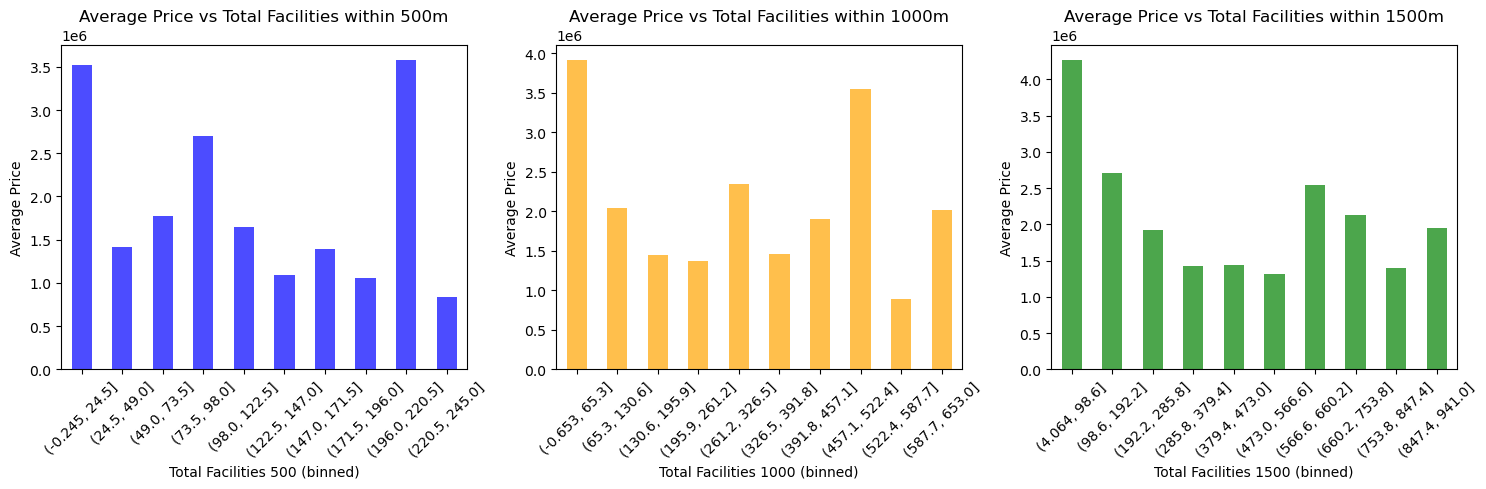

In [103]:
bins_500 = pd.cut(house_data['Total Facilities 500'], bins=10)  
bins_1000 = pd.cut(house_data['Total Facilities 1000'], bins=10)  
bins_1500 = pd.cut(house_data['Total Facilities 1500'], bins=10)  

# Calculating mean prices 
mean_price_500 = house_data.groupby(bins_500)['price'].mean()
mean_price_1000 = house_data.groupby(bins_1000)['price'].mean()
mean_price_1500 = house_data.groupby(bins_1500)['price'].mean()


plt.figure(figsize=(15, 5))

# Bar plot for 'Total Facilities within 500m' vs 'Price'
plt.subplot(1, 3, 1)
mean_price_500.plot(kind='bar', alpha=0.7, color='blue')
plt.xlabel('Total Facilities 500 (binned)')
plt.ylabel('Average Price')
plt.title('Average Price vs Total Facilities within 500m')
plt.xticks(rotation=45)

# Bar plot for 'Total Facilities within 1000m' vs 'Price'
plt.subplot(1, 3, 2)
mean_price_1000.plot(kind='bar', alpha=0.7, color='orange')
plt.xlabel('Total Facilities 1000 (binned)')
plt.ylabel('Average Price')
plt.title('Average Price vs Total Facilities within 1000m')
plt.xticks(rotation=45)

# Bar plot for 'Total Facilities within 1500m' vs 'Price'
plt.subplot(1, 3, 3)
mean_price_1500.plot(kind='bar', alpha=0.7, color='green')
plt.xlabel('Total Facilities 1500 (binned)')
plt.ylabel('Average Price')
plt.title('Average Price vs Total Facilities within 1500m')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

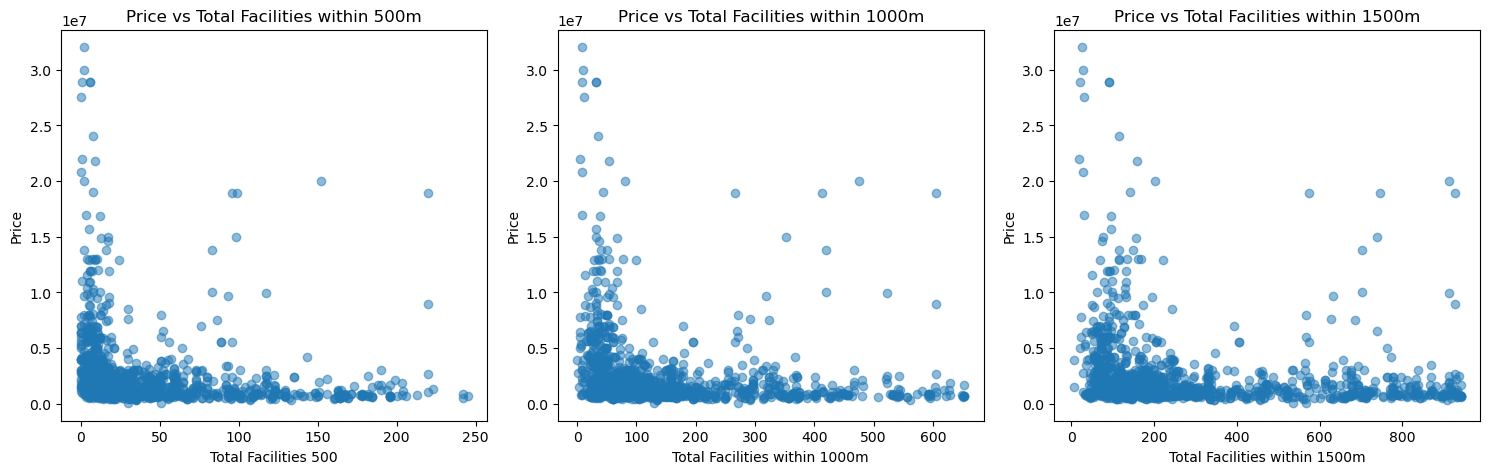

In [105]:

# Plotting the distribution diagrams
plt.figure(figsize=(15, 5))

# Plot for 'Total Facilities within 500m' vs 'Price'
plt.subplot(1, 3, 1)
plt.scatter(house_data['Total Facilities 500'], house_data['price'], alpha=0.5)
plt.xlabel('Total Facilities 500')
plt.ylabel('Price')
plt.title('Price vs Total Facilities within 500m')

# Plot for 'Total Facilities within 1000m' vs 'Price'
plt.subplot(1, 3, 2)
plt.scatter(house_data['Total Facilities 1000'], house_data['price'], alpha=0.5)
plt.xlabel('Total Facilities within 1000m')
plt.ylabel('Price')
plt.title('Price vs Total Facilities within 1000m')

# Plot for 'Total Facilities within 1500m' vs 'Price'
plt.subplot(1, 3, 3)
plt.scatter(house_data['Total Facilities 1500'], house_data['price'], alpha=0.5)
plt.xlabel('Total Facilities within 1500m')
plt.ylabel('Price')
plt.title('Price vs Total Facilities within 1500m')

plt.tight_layout()
plt.show()


The 500m scatter plot shows the clearest trend between the number of facilities and price. The relationship shows as the radius increases because the count of facilities grows larger, leading to less variance in facility density within a larger area. This suggests that proximity plays a more significant role in affecting price when the distance is smaller

/var/folders/kr/mb7cs7957lgdx7nb77dj9ddr0000gn/T/ipykernel_41640/355350205.py:3: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=silverman`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(x=house_data['Total Facilities 500'], y=house_data['price'], shade=True, cmap='viridis', bw='silverman', cbar=True)
/var/folders/kr/mb7cs7957lgdx7nb77dj9ddr0000gn/T/ipykernel_41640/355350205.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=house_data['Total Facilities 500'], y=house_data['price'], shade=True, cmap='viridis', bw='silverman', cbar=True)


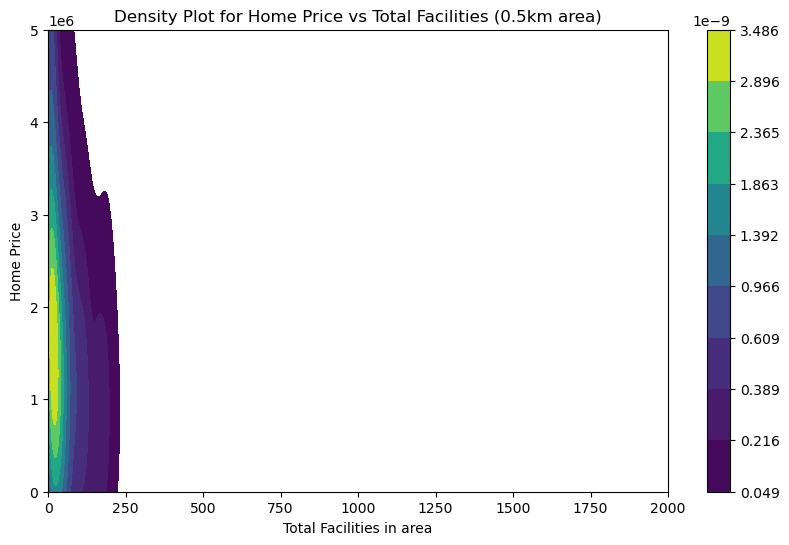

In [108]:
# Plotting a density plot for house price and total facilities
plt.figure(figsize=(10, 6))
sns.kdeplot(x=house_data['Total Facilities 500'], y=house_data['price'], shade=True, cmap='viridis', bw='silverman', cbar=True)
plt.xlabel('Total Facilities in area')
plt.ylabel('Home Price')
plt.title('Density Plot for Home Price vs Total Facilities (0.5km area)')

# Setting limits for x and y axes to zoom in on a specific region
plt.xlim(0, 2000)
plt.ylim(0, 5000000)

plt.show()


/var/folders/kr/mb7cs7957lgdx7nb77dj9ddr0000gn/T/ipykernel_41640/1869646351.py:2: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=silverman`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(x=house_data['Total Facilities 1000'], y=house_data['price'], shade=True, cmap='viridis', bw='silverman', cbar=True)
/var/folders/kr/mb7cs7957lgdx7nb77dj9ddr0000gn/T/ipykernel_41640/1869646351.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=house_data['Total Facilities 1000'], y=house_data['price'], shade=True, cmap='viridis', bw='silverman', cbar=True)


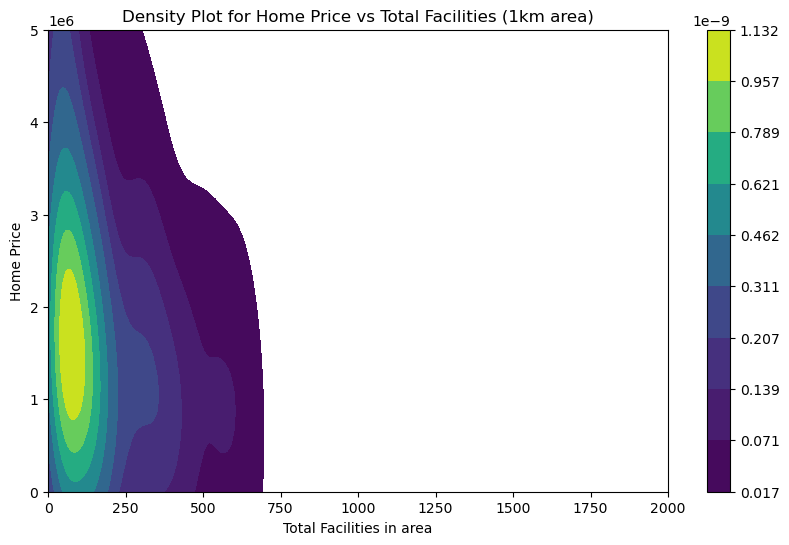

In [110]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x=house_data['Total Facilities 1000'], y=house_data['price'], shade=True, cmap='viridis', bw='silverman', cbar=True)
plt.xlabel('Total Facilities in area')
plt.ylabel('Home Price')
plt.title('Density Plot for Home Price vs Total Facilities (1km area)')

# Setting limits for x and y axes to zoom in on a specific region
plt.xlim(0, 2000)
plt.ylim(0, 5000000)

plt.show()

/var/folders/kr/mb7cs7957lgdx7nb77dj9ddr0000gn/T/ipykernel_41640/2260999335.py:2: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=silverman`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(x=house_data['Total Facilities 1500'], y=house_data['price'], shade=True, cmap='viridis', bw='silverman', cbar=True)
/var/folders/kr/mb7cs7957lgdx7nb77dj9ddr0000gn/T/ipykernel_41640/2260999335.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=house_data['Total Facilities 1500'], y=house_data['price'], shade=True, cmap='viridis', bw='silverman', cbar=True)


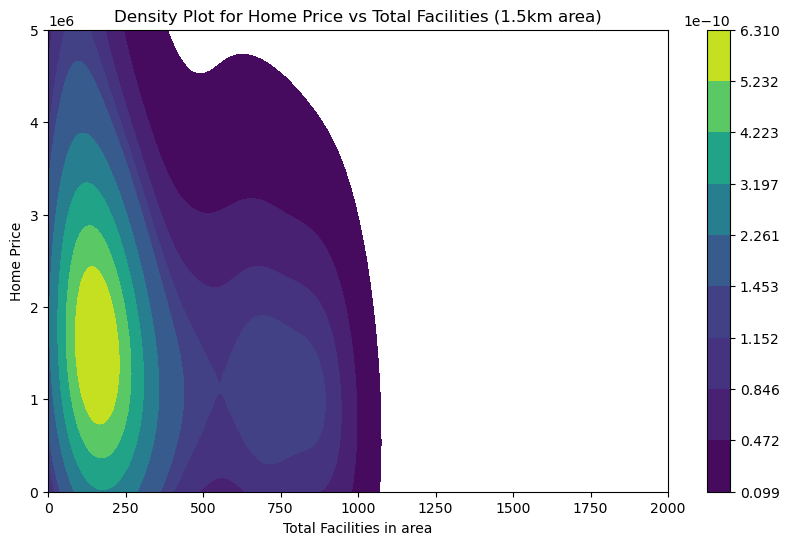

In [112]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x=house_data['Total Facilities 1500'], y=house_data['price'], shade=True, cmap='viridis', bw='silverman', cbar=True)
plt.xlabel('Total Facilities in area')
plt.ylabel('Home Price')
plt.title('Density Plot for Home Price vs Total Facilities (1.5km area)')

# Setting limits for x and y axes to zoom in on a specific region
plt.xlim(0, 2000)
plt.ylim(0, 5000000)

plt.show()

The 0.5km density plot shows the clearest relationship, with a well-defined cluster around lower facility counts and a strong price concentration. This suggests that facilities within a smaller radius have a more significant influence on home prices compared to those at larger radii.

Based on this analysis, we will choose 500M buffer as the best buffer. Therefore, we will replace the best buffer defined by model with all 500m buffer. 

In [92]:
new_data =  pd.read_csv('Vancouver_Houses_Facilities_0.5km.csv')

new_data['street address'] = new_data['Street address'].str.lower()

In [94]:
# Columns to be dropped from house_data
columns_to_drop = [
    'school_best_buffer_area_1.5_values',
    'bus stop_best_buffer_area_1.5_values',
    'restaurant_best_buffer_area_1.5_values',
    'cafe_best_buffer_area_1.5_values',
    'railway station_best_buffer_area_1.5_values',
    'supermarket_best_buffer_area_1.5_values',
    'pub_best_buffer_area_1.5_values',
    'fast food_best_buffer_area_1.5_values',
    'post office_best_buffer_area_1.5_values'
    

]

# Drop these columns from house_data
house_data = house_data.drop(columns=columns_to_drop, errors='ignore')

# Columns to be added from new_data
columns_to_add = ['street address', 'School in area', 'Restaurant in area', 'Cafe in area', 'Bus Stop in area',
                 'Railway Station in area','Supermarket in area','Pub in area','Fast Food in area','Post Office in area']


# Merge the new_data columns with house_data based on 'street address'
house_data = house_data.merge(new_data[columns_to_add], on='street address', how='left')

# Rename the new columns
house_data = house_data.rename(columns={
    'School in area': 'school_best_buffer_area_0.5_values',
    'Bus Stop in area': 'bus stop_best_buffer_area_0.5_values',
    'Restaurant in area': 'restaurant_best_buffer_area_0.5_values',
    'Cafe in area': 'cafe_best_buffer_area_0.5_values',
    'Railway Station in area':'railway station_best_buffer_area_0.5_values',
    'Supermarket in area':'supermarket_best_buffer_area_0.5_values',
    'Pub in area': 'pub_best_buffer_area_0.5_values',
    'Fast Food in area':'fast food_best_buffer_area_0.5_values',
    'Post Office in area':'post office_best_buffer_area_0.5_values'
})

house_data = house_data.loc[:, ~house_data.columns.duplicated()]

house_data.to_csv('final_merged_van.csv', index=False)
house_data.head()

,Unnamed: 0,neighbourhood_left,unnamed: 0,street address,latitude,longitude,geometry,price,bedrooms,bathrooms,...,Total Facilities 500,Total Facilities 1000,Total Facilities 1500,school_best_buffer_area_0.5_values,restaurant_best_buffer_area_0.5_values,cafe_best_buffer_area_0.5_values,bus stop_best_buffer_area_0.5_values,supermarket_best_buffer_area_0.5_values,fast food_best_buffer_area_0.5_values,post office_best_buffer_area_0.5_values
0,0,arbutus ridge,38,2795 w 37th ave,49.238765,-123.167839,POINT (-2503174.725616975 6367086.465147689),5750000,5,7,...,6,23,85,0,0,0,6,0,0,0
1,1,arbutus ridge,78,4422 quesnel dr,49.247018,-123.168268,POINT (-2502625.567097398 6367947.738663315),8680000,5,6,...,13,21,55,0,1,0,11,0,1,0
2,2,arbutus ridge,125,4101 yew st #304,49.248583,-123.155246,POINT (-2501646.670850805 6367510.574749248),699900,1,1,...,17,32,71,0,0,1,12,2,2,0
3,3,arbutus ridge,175,2556 w 20th ave,49.254284,-123.163295,POINT (-2501784.918511952 6368460.741179269),4290000,6,5,...,4,34,135,0,1,0,2,1,0,0
4,4,arbutus ridge,184,2638 w 22nd ave,49.252494,-123.164150,POINT (-2501967.299510082 6368317.397572626),5780000,4,5,...,5,35,115,0,1,0,3,0,1,0


### School EDA

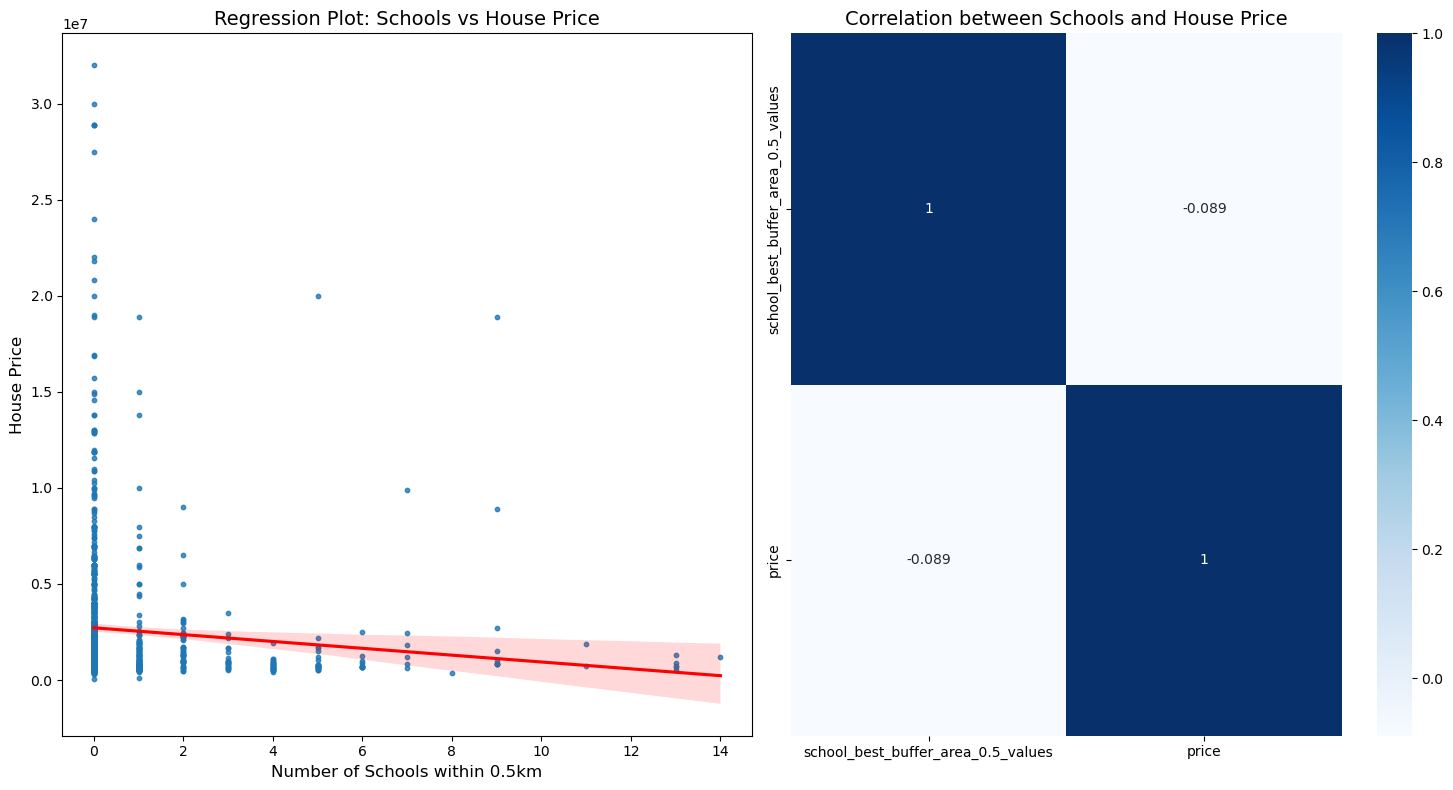

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Plot 1: Scatter plot
sns.regplot(
    data=house_data,
    x='school_best_buffer_area_0.5_values',
    y='price',
    ax=axes[0],
    scatter_kws={'s': 10},
    line_kws={'color': 'red'}
)
axes[0].set_title('Regression Plot: Schools vs House Price', fontsize=14)
axes[0].set_xlabel('Number of Schools within 0.5km', fontsize=12)
axes[0].set_ylabel('House Price', fontsize=12)

# Plot 2: Correlation Matrix
corr_matrix = house_data[['school_best_buffer_area_0.5_values', 'price']].corr()
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='Blues',
    cbar=True,
    ax=axes[1]
)
axes[1].set_title('Correlation between Schools and House Price', fontsize=14)


plt.tight_layout()
plt.show()


There is almost no linear relationship between the number of nearby schools and the house price.

### Restaurant EDA

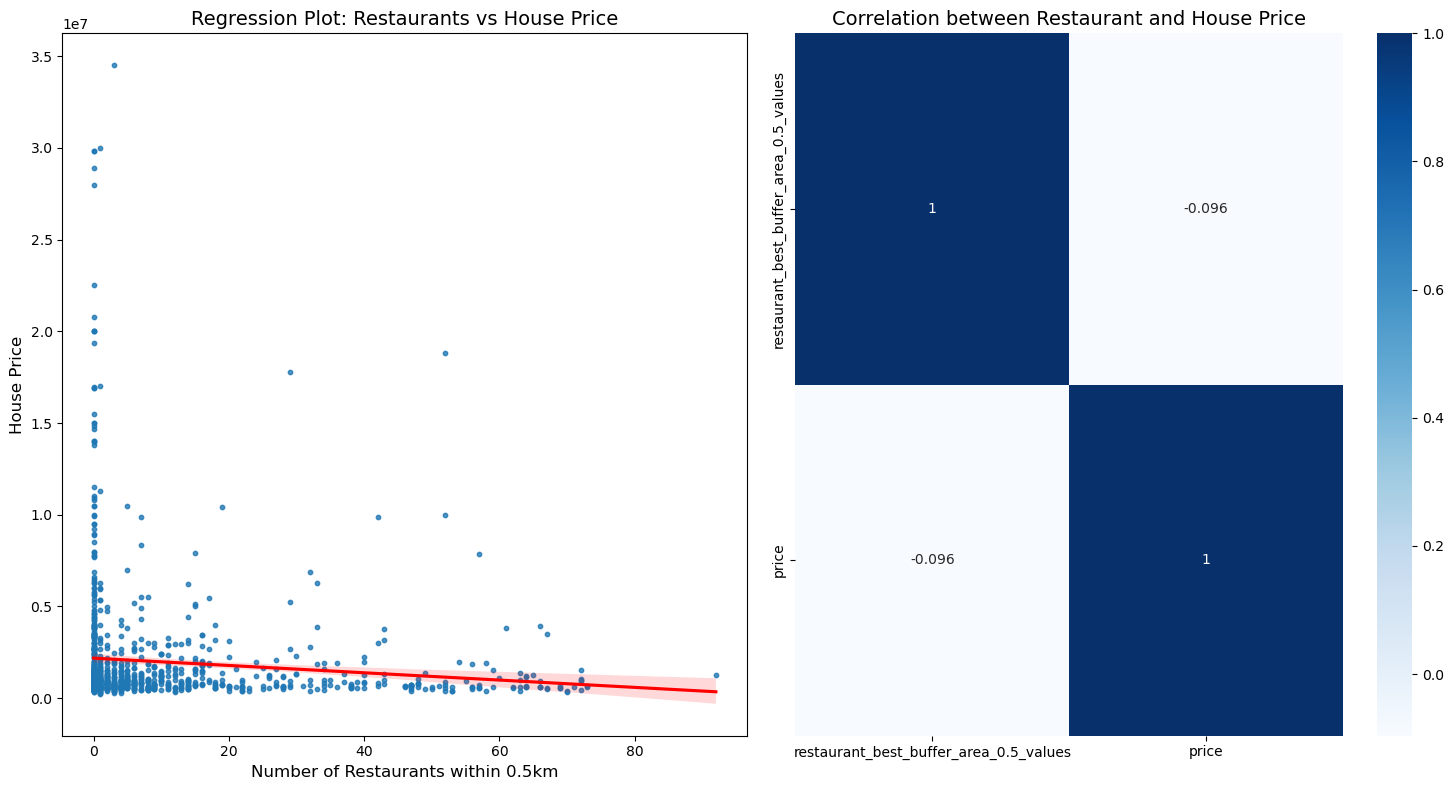

In [60]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Plot 1: Scatter plot
sns.regplot(
    data=house_data,
    x='restaurant_best_buffer_area_0.5_values',
    y='price',
    ax=axes[0],
    scatter_kws={'s': 10},
    line_kws={'color': 'red'}
)
axes[0].set_title('Regression Plot: Restaurants vs House Price', fontsize=14)
axes[0].set_xlabel('Number of Restaurants within 0.5km', fontsize=12)
axes[0].set_ylabel('House Price', fontsize=12)

# Plot 2: Correlation Matrix
corr_matrix = house_data[['restaurant_best_buffer_area_0.5_values', 'price']].corr()
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='Blues',
    cbar=True,
    ax=axes[1]
)
axes[1].set_title('Correlation between Restaurant and House Price', fontsize=14)


plt.tight_layout()
plt.show()

### Bus EDA

<function matplotlib.pyplot.show(close=None, block=None)>

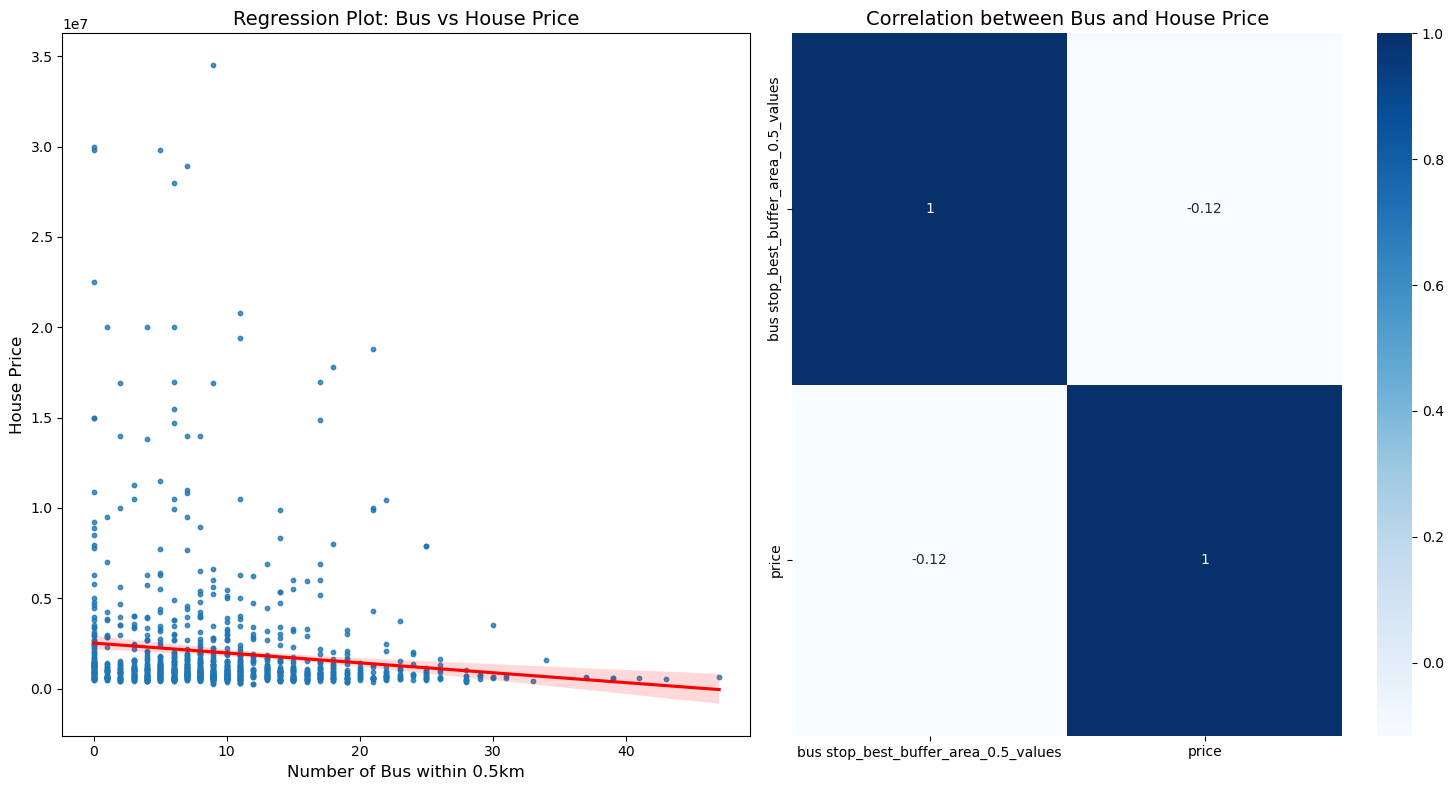

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Plot 1: Scatter plot
sns.regplot(
    data=house_data,
    x='bus stop_best_buffer_area_0.5_values',
    y='price',
    ax=axes[0],
    scatter_kws={'s': 10},
    line_kws={'color': 'red'}
)
axes[0].set_title('Regression Plot: Bus vs House Price', fontsize=14)
axes[0].set_xlabel('Number of Bus within 0.5km', fontsize=12)
axes[0].set_ylabel('House Price', fontsize=12)

# Plot 2: Correlation Matrix
corr_matrix = house_data[['bus stop_best_buffer_area_0.5_values', 'price']].corr()
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='Blues',
    cbar=True,
    ax=axes[1]
)
axes[1].set_title('Correlation between Bus and House Price', fontsize=14)


plt.tight_layout()
plt.show

### Supermarket EDA

<function matplotlib.pyplot.show(close=None, block=None)>

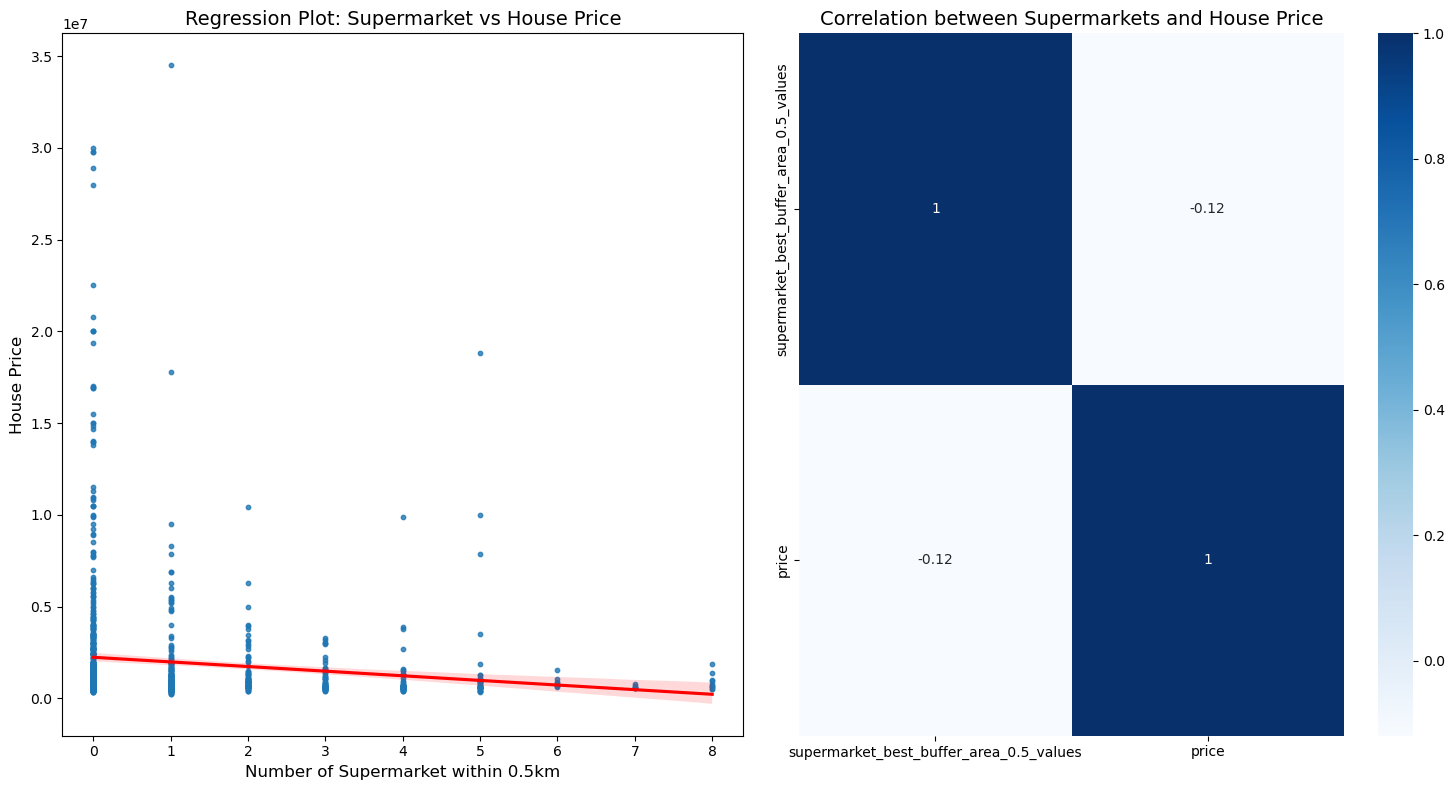

In [66]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Plot 1: Scatter plot
sns.regplot(
    data=house_data,
    x='supermarket_best_buffer_area_0.5_values',
    y='price',
    ax=axes[0],
    scatter_kws={'s': 10},
    line_kws={'color': 'red'}
)
axes[0].set_title('Regression Plot: Supermarket vs House Price', fontsize=14)
axes[0].set_xlabel('Number of Supermarket within 0.5km', fontsize=12)
axes[0].set_ylabel('House Price', fontsize=12)

# Plot 2: Correlation Matrix
corr_matrix = house_data[['supermarket_best_buffer_area_0.5_values', 'price']].corr()
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='Blues',
    cbar=True,
    ax=axes[1]
)
axes[1].set_title('Correlation between Supermarkets and House Price', fontsize=14)


plt.tight_layout()
plt.show

Although, we didn't plot all the features out, from the above plots and Datafram, we can see there are many 0s of each facilities, and the impact to the house price is not clear (most have negative impact). This can not show the trend very well. Therefore, we will add similiar facilities together to see if a better trend will be shown.  

In [96]:

house_data['public_transit_best_buffer_area_0.5_values'] = house_data['bus stop_best_buffer_area_0.5_values'] + house_data['railway station_best_buffer_area_0.5_values']
house_data['restaurants_best_buffer_area_0.5_values'] = house_data['restaurant_best_buffer_area_0.5_values'] + house_data['cafe_best_buffer_area_0.5_values']+house_data['pub_best_buffer_area_0.5_values']+ house_data['fast food_best_buffer_area_0.5_values']
house_data['public_service_best_buffer_area_0.5_values'] = house_data['hospital_best_buffer_area_0.5_values'] + house_data['school_best_buffer_area_0.5_values']
house_data['other_dailylife_facilities_best_buffer_area_0.5_values'] = house_data['supermarket_best_buffer_area_0.5_values'] + house_data['dentist_best_buffer_area_0.5_values'] + house_data['kindergartens_best_buffer_area_0.5_values']+ house_data['malls_best_buffer_area_0.5_values'] + house_data['play ground_best_buffer_area_0.5_values']+ house_data['post office_best_buffer_area_0.5_values']


# Drop the original columns
house_data = house_data.drop(columns=['bus stop_best_buffer_area_0.5_values', 'railway station_best_buffer_area_0.5_values','restaurant_best_buffer_area_0.5_values',
                                     'cafe_best_buffer_area_0.5_values','pub_best_buffer_area_0.5_values', 'fast food_best_buffer_area_0.5_values',
                                    'hospital_best_buffer_area_0.5_values', 'school_best_buffer_area_0.5_values', 'supermarket_best_buffer_area_0.5_values',
                                     'dentist_best_buffer_area_0.5_values', 'kindergartens_best_buffer_area_0.5_values','malls_best_buffer_area_0.5_values',
                                     'play ground_best_buffer_area_0.5_values', 'post office_best_buffer_area_0.5_values'], errors='ignore')


house_data.to_csv('final_merged_van.csv', index=False)
house_data.head()

,Unnamed: 0,neighbourhood_left,unnamed: 0,street address,latitude,longitude,geometry,price,bedrooms,bathrooms,...,public_service_counts,public_transit_counts,other_counts,Total Facilities 500,Total Facilities 1000,Total Facilities 1500,public_transit_best_buffer_area_0.5_values,restaurants_best_buffer_area_0.5_values,public_service_best_buffer_area_0.5_values,other_dailylife_facilities_best_buffer_area_0.5_values
0,0,arbutus ridge,38,2795 w 37th ave,49.238765,-123.167839,POINT (-2503174.725616975 6367086.465147689),5750000,5,7,...,1,47,5,6,23,85,6,0,0,0
1,1,arbutus ridge,78,4422 quesnel dr,49.247018,-123.168268,POINT (-2502625.567097398 6367947.738663315),8680000,5,6,...,1,47,5,13,21,55,11,2,0,0
2,2,arbutus ridge,125,4101 yew st #304,49.248583,-123.155246,POINT (-2501646.670850805 6367510.574749248),699900,1,1,...,1,47,5,17,32,71,12,3,0,2
3,3,arbutus ridge,175,2556 w 20th ave,49.254284,-123.163295,POINT (-2501784.918511952 6368460.741179269),4290000,6,5,...,1,47,5,4,34,135,2,1,0,1
4,4,arbutus ridge,184,2638 w 22nd ave,49.252494,-123.164150,POINT (-2501967.299510082 6368317.397572626),5780000,4,5,...,1,47,5,5,35,115,3,2,0,0


# EDA Plot of 4 main Categories

After replacing the data, we will plot all the potential features out to see how they impact the price. 

## Public Service

The public service includes schools (university, college, high school, elementary school and middle school ), and hospital

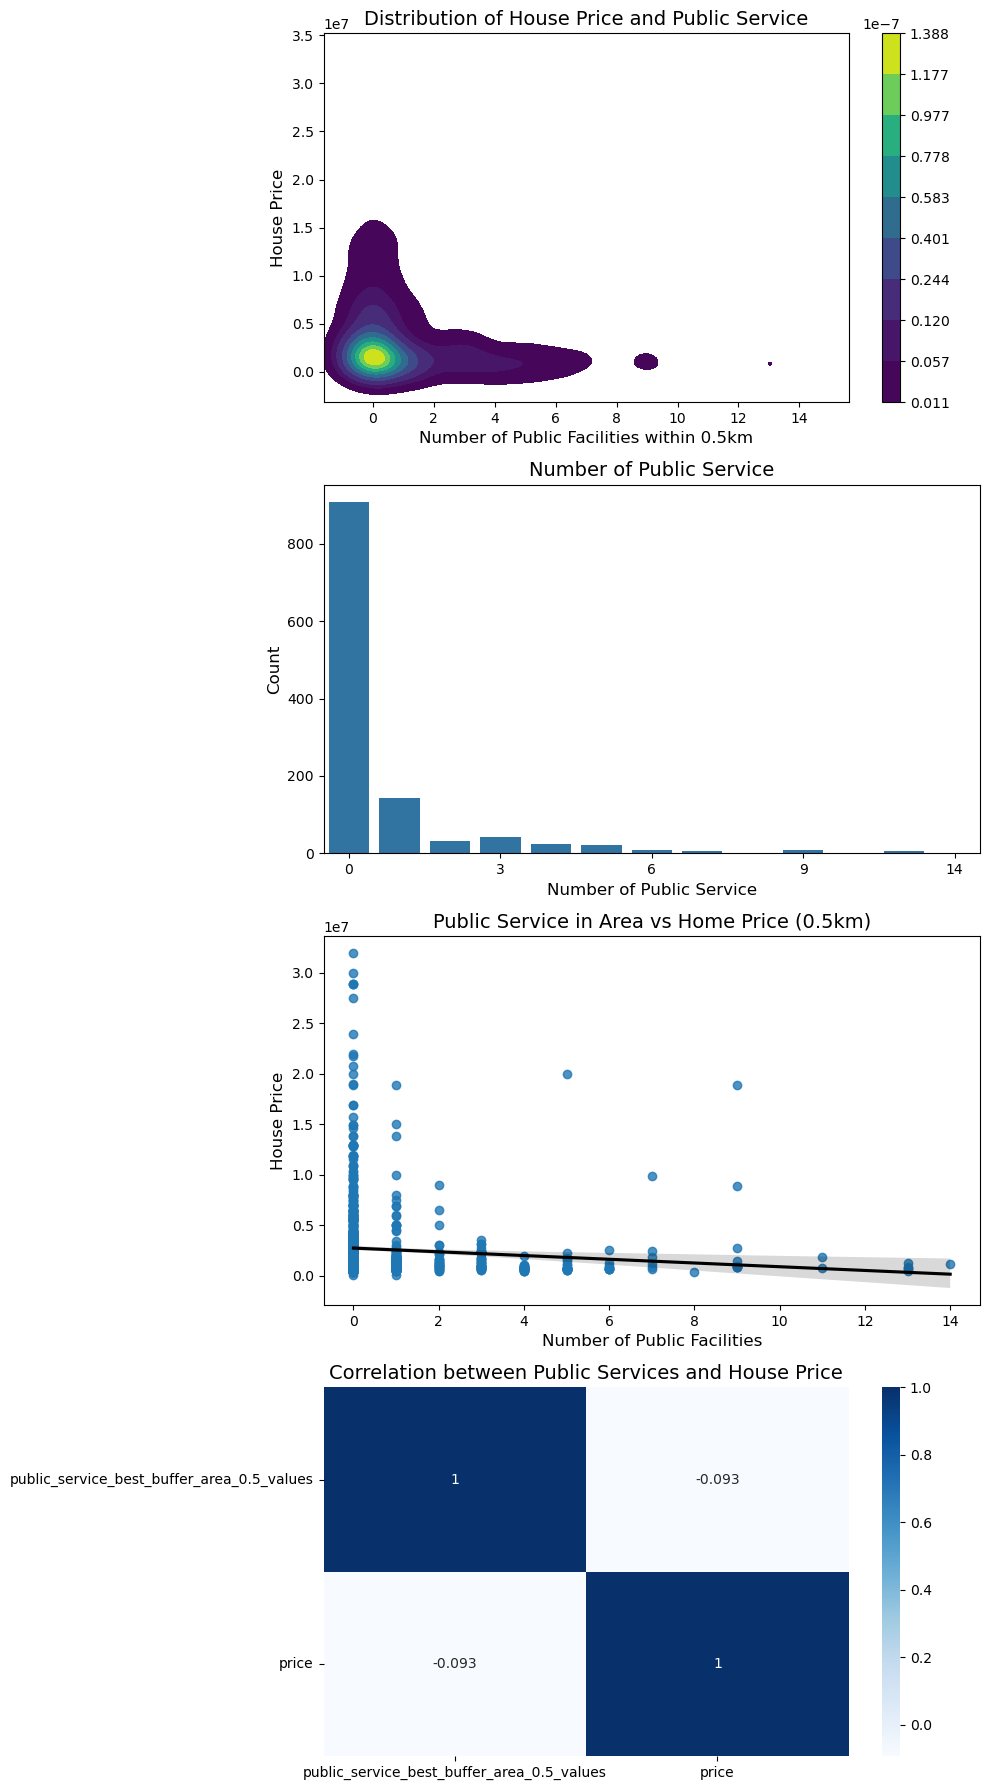

In [40]:
fig, axes = plt.subplots(4, 1, figsize=(10, 18))

# Plot 1: KDE plot
sns.kdeplot(
    data=house_data,
    x='public_service_best_buffer_area_0.5_values',
    y='price',
    cmap='viridis',
    fill=True,
    cbar=True,
    ax=axes[0]
)
axes[0].set_title('Distribution of House Price and Public Service', fontsize=14)
axes[0].set_xlabel('Number of Public Facilities within 0.5km', fontsize=12)
axes[0].set_ylabel('House Price', fontsize=12)

# Plot 2: Count plot
sns.countplot(
    x='public_service_best_buffer_area_0.5_values',
    data=house_data,
    ax=axes[1]
)
axes[1].set_title('Number of Public Service', fontsize=14)
axes[1].set_xlabel('Number of Public Service', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].set_xticks(axes[1].get_xticks()[::3])  

# Plot 3: Jointplot (scatter + regression)
sns.regplot(
    data=house_data,
    x='public_service_best_buffer_area_0.5_values',
    y='price',
    ax=axes[2],
    line_kws={'color': 'black'}
)
axes[2].set_title('Public Service in Area vs Home Price (0.5km)', fontsize=14)
axes[2].set_xlabel('Number of Public Facilities', fontsize=12)
axes[2].set_ylabel('House Price', fontsize=12)

# Plot 4: Correlation Matrix
corr_matrix = house_data[['public_service_best_buffer_area_0.5_values', 'price']].corr()
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='Blues',
    cbar=True,
    ax=axes[3]
)
axes[3].set_title('Correlation between Public Services and House Price', fontsize=14)


plt.tight_layout()
plt.show()

## Public Transit

This includes Bus and Railway

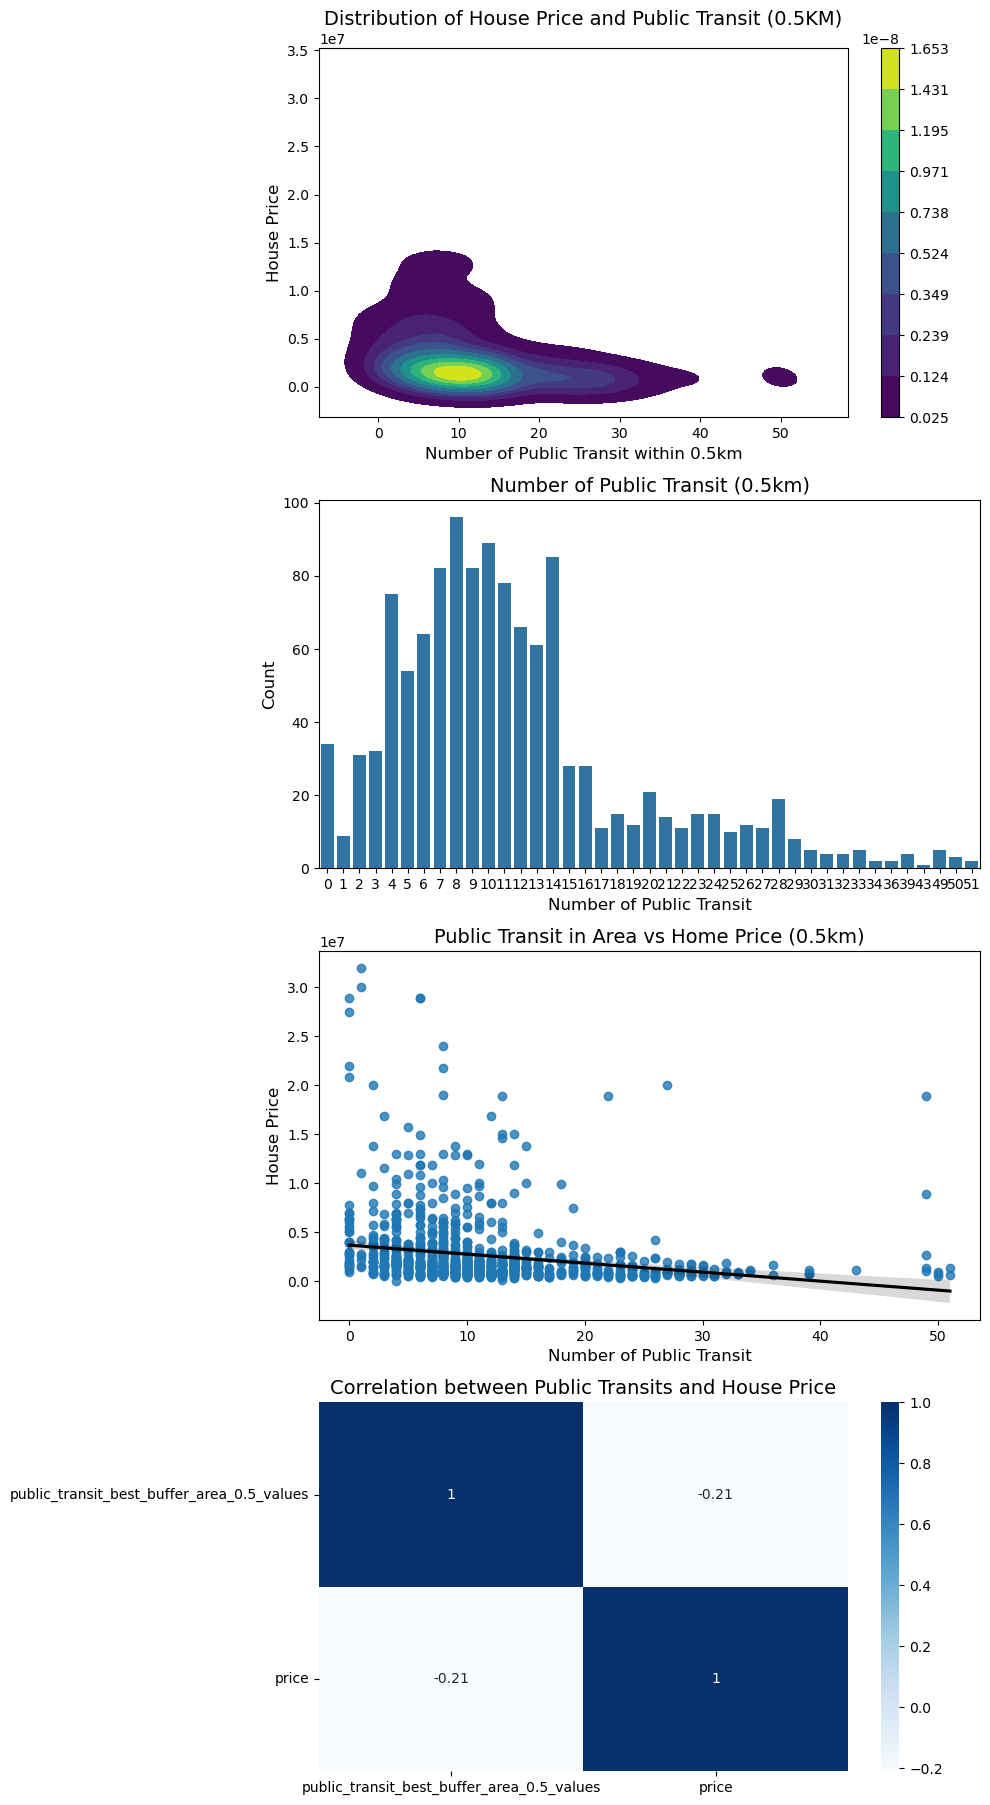

In [43]:
fig, axes = plt.subplots(4, 1, figsize=(10, 18))
# Plot 1: KDE plot
sns.kdeplot(
    data=house_data,
    x='public_transit_best_buffer_area_0.5_values',
    y='price',
    cmap='viridis',
    fill=True,
    cbar=True,
    ax=axes[0]
)
axes[0].set_title('Distribution of House Price and Public Transit (0.5KM)', fontsize=14)
axes[0].set_xlabel('Number of Public Transit within 0.5km', fontsize=12)
axes[0].set_ylabel('House Price', fontsize=12)

# Plot 2: Count plot
sns.countplot(
    x='public_transit_best_buffer_area_0.5_values',
    data=house_data,
    ax=axes[1]
)
axes[1].set_title('Number of Public Transit (0.5km)', fontsize=14)
axes[1].set_xlabel('Number of Public Transit', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)


# Plot 3: Jointplot (scatter + regression)
sns.regplot(
    data=house_data,
    x='public_transit_best_buffer_area_0.5_values',
    y='price',
    ax=axes[2],
    line_kws={'color': 'black'}
)
axes[2].set_title('Public Transit in Area vs Home Price (0.5km)', fontsize=14)
axes[2].set_xlabel('Number of Public Transit', fontsize=12)
axes[2].set_ylabel('House Price', fontsize=12)

# Plot 4: Correlation Matrix
corr_matrix = house_data[['public_transit_best_buffer_area_0.5_values', 'price']].corr()
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='Blues',
    cbar=True,
    ax=axes[3]
)
axes[3].set_title('Correlation between Public Transits and House Price', fontsize=14)

plt.tight_layout()
plt.show()

## Resturants

This inclues pubs, fast food, cafe, and resturant

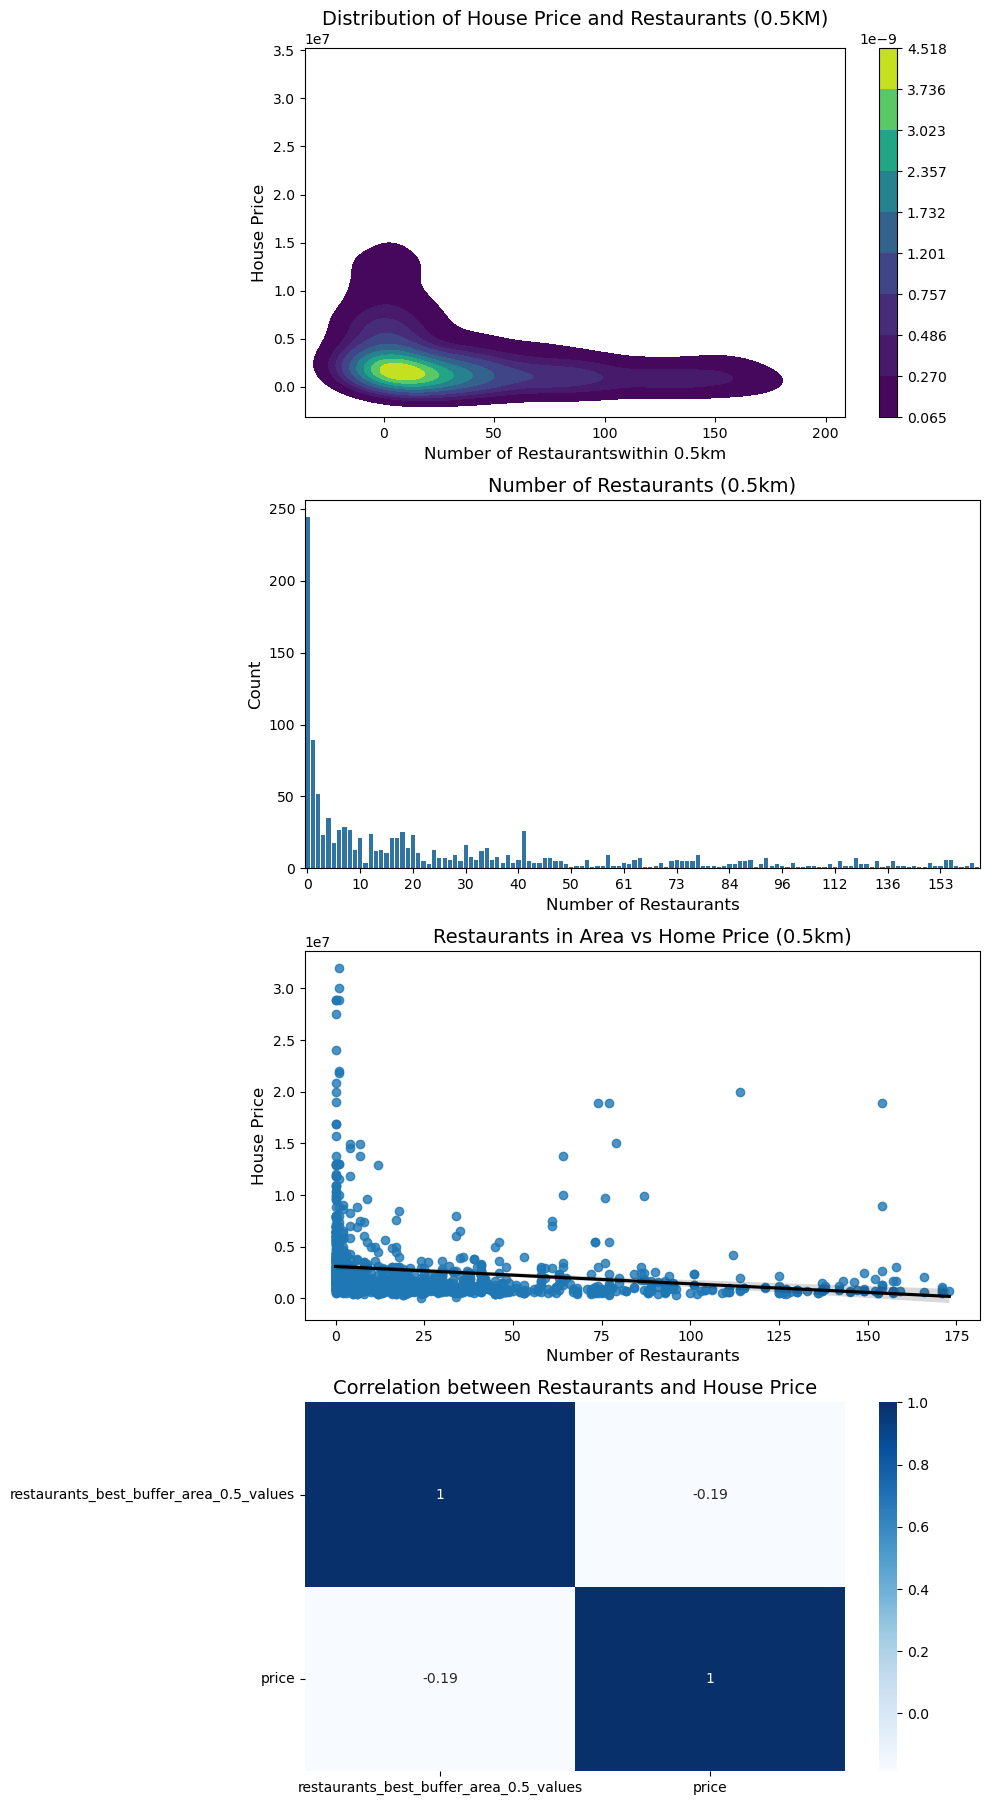

In [46]:
fig, axes = plt.subplots(4, 1, figsize=(10, 18))

# Plot 1: KDE plot
sns.kdeplot(
    data=house_data,
    x='restaurants_best_buffer_area_0.5_values',
    y='price',
    cmap='viridis',
    fill=True,
    cbar=True,
    ax=axes[0]
)
axes[0].set_title('Distribution of House Price and Restaurants (0.5KM)', fontsize=14)
axes[0].set_xlabel('Number of Restaurantswithin 0.5km', fontsize=12)
axes[0].set_ylabel('House Price', fontsize=12)

# Plot 2: Count plot
sns.countplot(
    x='restaurants_best_buffer_area_0.5_values',
    data=house_data,
    ax=axes[1]
)
axes[1].set_title('Number of Restaurants (0.5km)', fontsize=14)
axes[1].set_xlabel('Number of Restaurants', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].set_xticks(axes[1].get_xticks()[::10])  


# Plot 3: Jointplot (scatter + regression)
sns.regplot(
    data=house_data,
    x='restaurants_best_buffer_area_0.5_values',
    y='price',
    ax=axes[2],
    line_kws={'color': 'black'}
)
axes[2].set_title('Restaurants in Area vs Home Price (0.5km)', fontsize=14)
axes[2].set_xlabel('Number of Restaurants', fontsize=12)
axes[2].set_ylabel('House Price', fontsize=12)

# Plot 4: Correlation Matrix
corr_matrix = house_data[['restaurants_best_buffer_area_0.5_values', 'price']].corr()
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='Blues',
    cbar=True,
    ax=axes[3]
)
axes[3].set_title('Correlation between Restaurants and House Price', fontsize=14)


plt.tight_layout()
plt.show()

## Dailylife Facilities

This includes, supermarket, dentist, kindergartens, mall, play ground, and post office. 


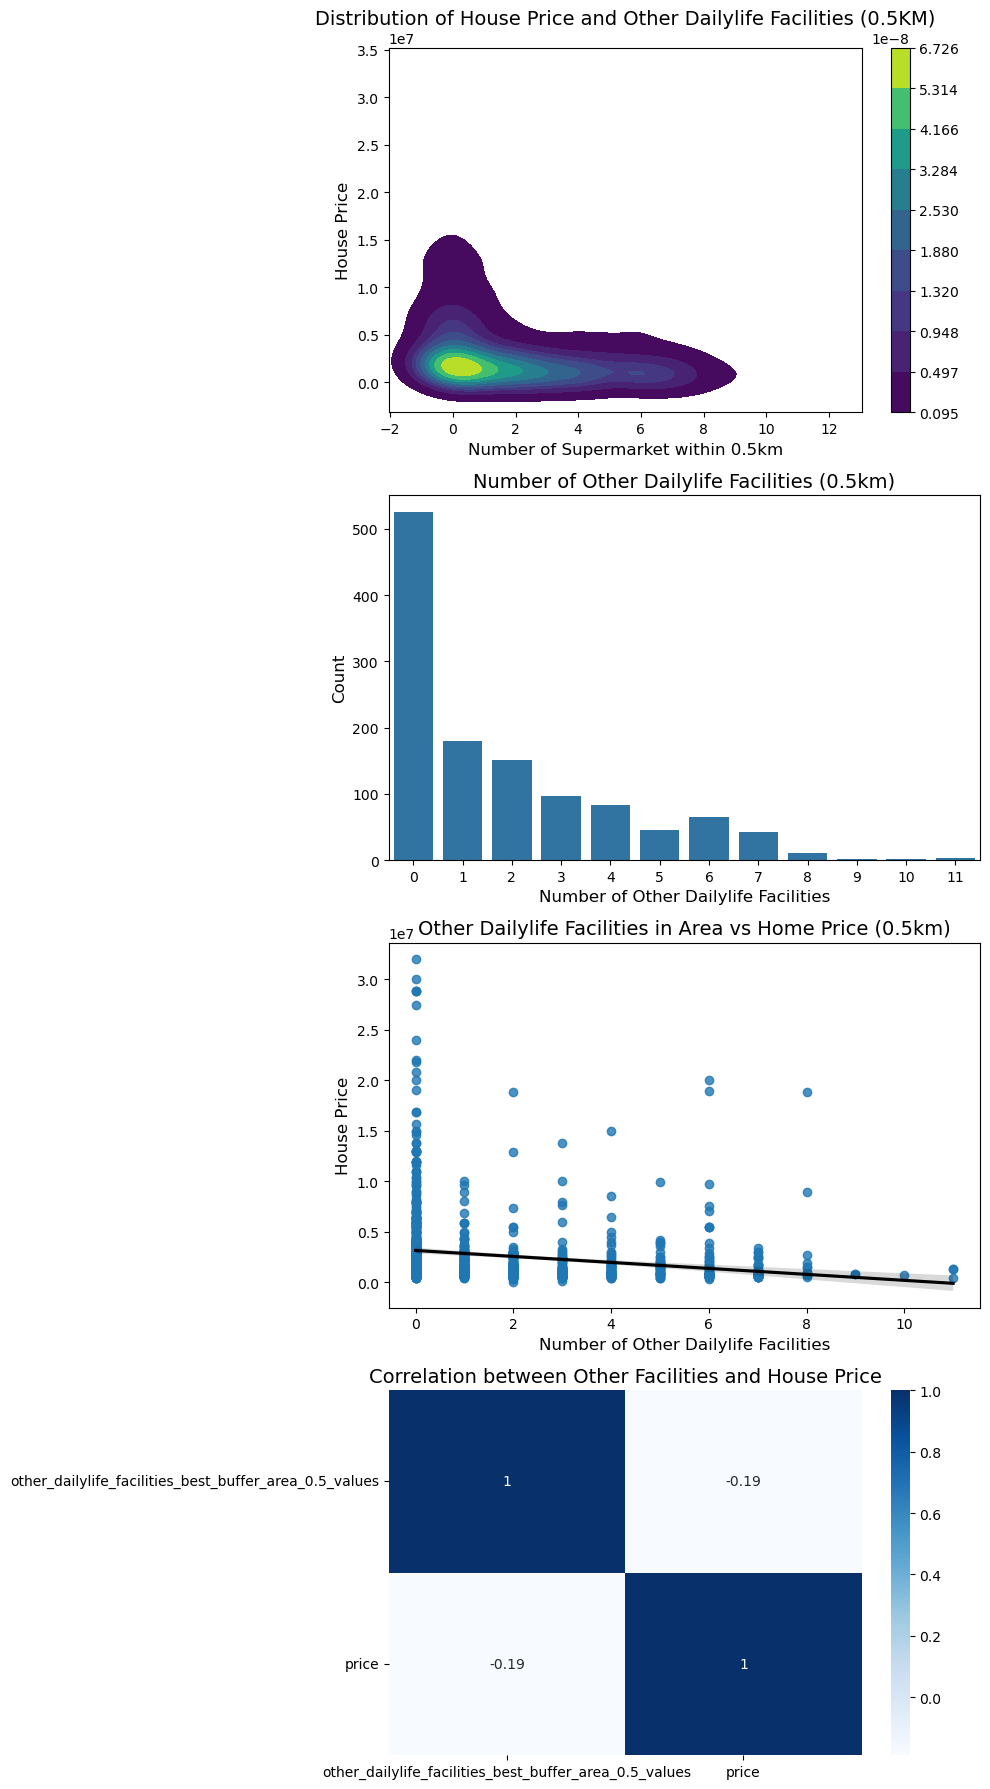

In [49]:
fig, axes = plt.subplots(4, 1, figsize=(10, 18))

# Plot 1: KDE plot
sns.kdeplot(
    data=house_data,
    x='other_dailylife_facilities_best_buffer_area_0.5_values',
    y='price',
    cmap='viridis',
    fill=True,
    cbar=True,
    ax=axes[0]
)
axes[0].set_title('Distribution of House Price and Other Dailylife Facilities (0.5KM)', fontsize=14)
axes[0].set_xlabel('Number of Supermarket within 0.5km', fontsize=12)
axes[0].set_ylabel('House Price', fontsize=12)

# Plot 2: Count plot
sns.countplot(
    x='other_dailylife_facilities_best_buffer_area_0.5_values',
    data=house_data,
    ax=axes[1]
)
axes[1].set_title('Number of Other Dailylife Facilities (0.5km)', fontsize=14)
axes[1].set_xlabel('Number of Other Dailylife Facilities', fontsize=12)
axes[1].set_ylabel('Count', fontsize=12)


# Plot 3: Jointplot (scatter + regression)
sns.regplot(
    data=house_data,
    x='other_dailylife_facilities_best_buffer_area_0.5_values',
    y='price',
    ax=axes[2],
    line_kws={'color': 'black'}
)
axes[2].set_title('Other Dailylife Facilities in Area vs Home Price (0.5km)', fontsize=14)
axes[2].set_xlabel('Number of Other Dailylife Facilities', fontsize=12)
axes[2].set_ylabel('House Price', fontsize=12)

# Plot 4: Correlation Matrix
corr_matrix = house_data[['other_dailylife_facilities_best_buffer_area_0.5_values', 'price']].corr()
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='Blues',
    cbar=True,
    ax=axes[3]
)
axes[3].set_title('Correlation between Other Facilities and House Price', fontsize=14)

plt.tight_layout()
plt.show()

Based on the observation, we can found that nearby feature will not affect house price that much

# Neighbourhood and Facilities EDA¶

Then Let check how the nearby facilities impact the neighbourhood

## Restaurant

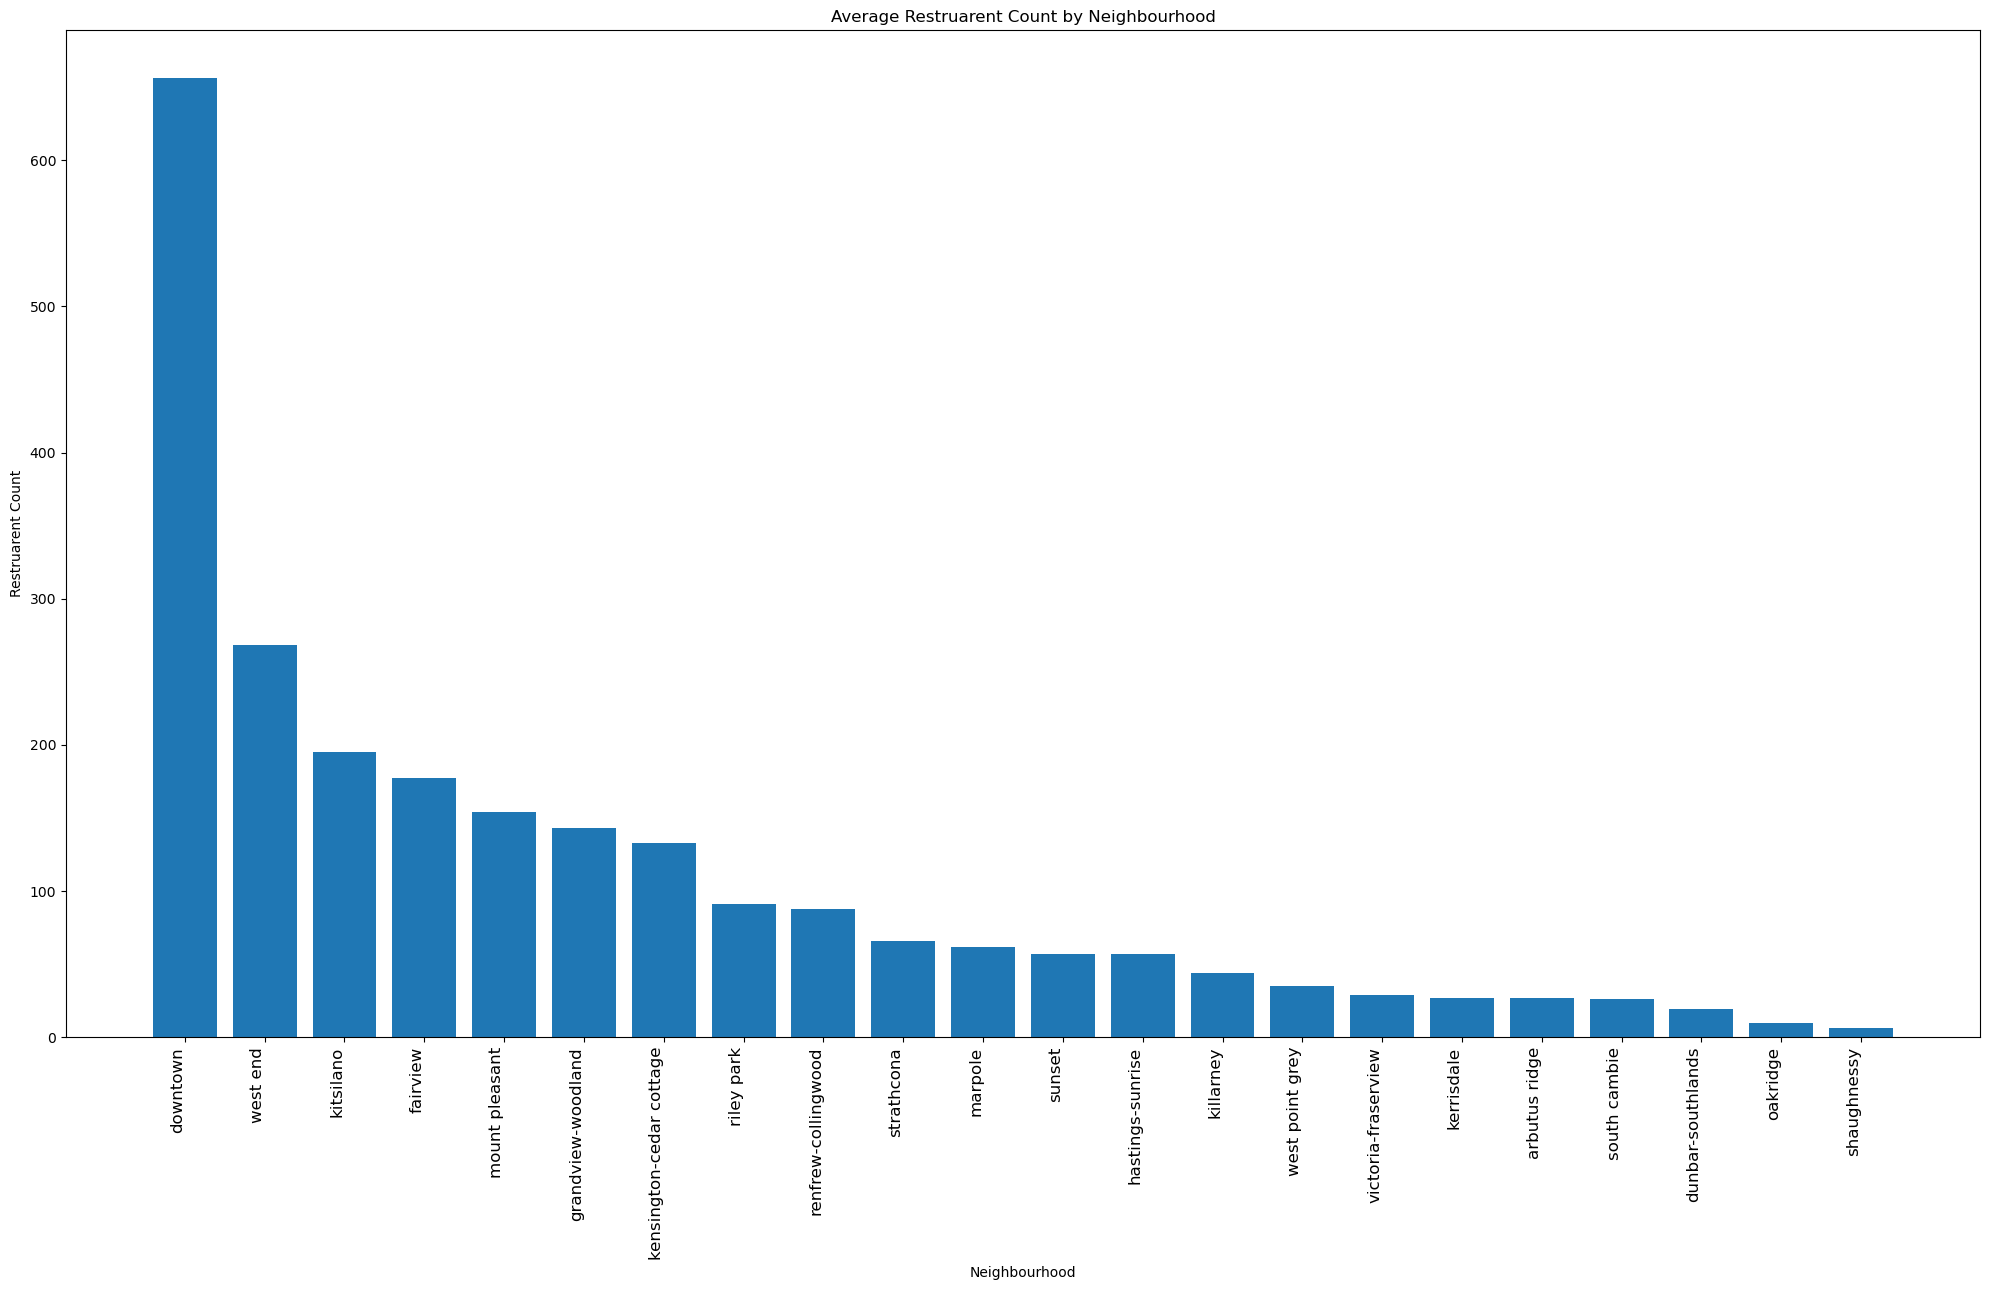

In [138]:
# Bar plot 
grouped_data = house_data.groupby('neighbourhood_right')['restruarent_counts'].mean().sort_values(ascending=False)

plt.figure(figsize=(20, 13))
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Neighbourhood')
plt.ylabel('Restruarent Count')  # Updated label to match the data
plt.title('Average Restruarent Count by Neighbourhood')  # Updated title to match the data
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.tight_layout()
plt.show()


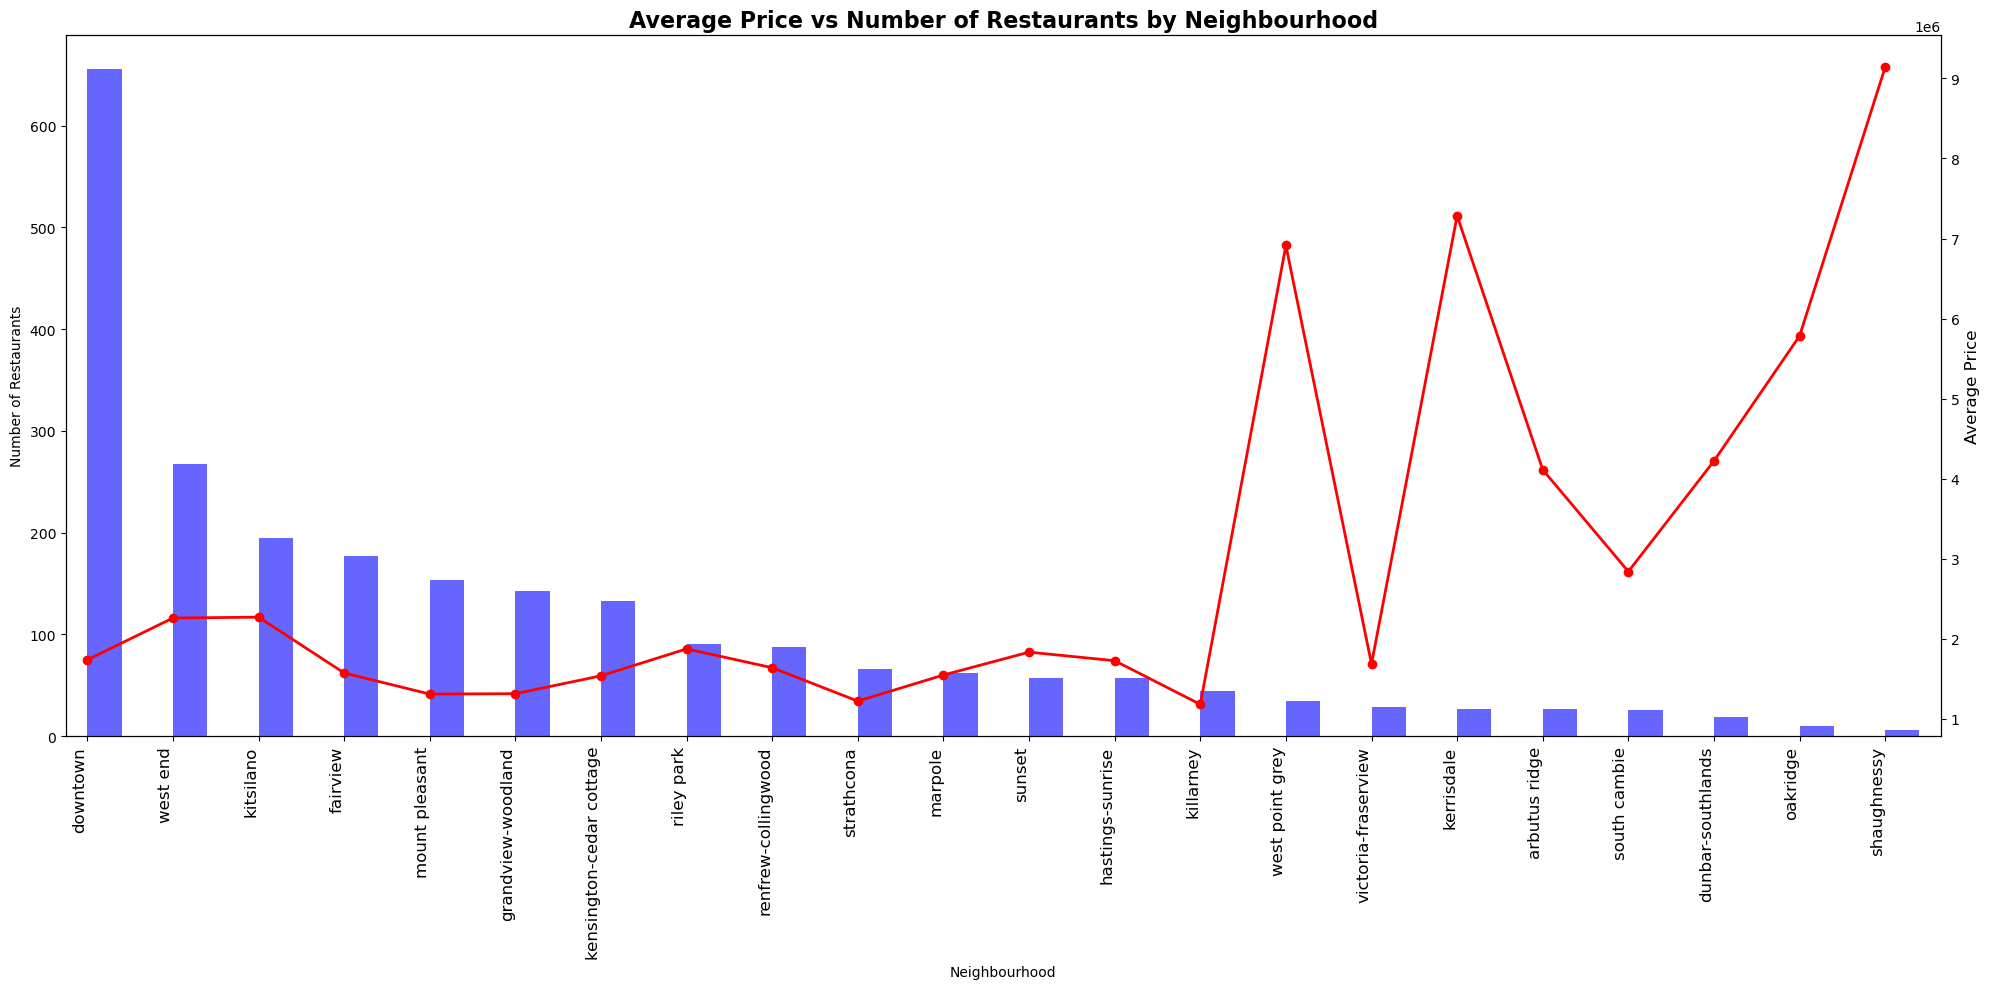

In [68]:
neighbourhood_avg_price = house_data.groupby('neighbourhood_right')['price'].mean()
neighbourhood_restaurant_counts = house_data.groupby('neighbourhood_right')['restruarent_counts'].mean()

neighbourhood_data = pd.DataFrame({
    'Average Price': neighbourhood_avg_price,
    'Restaurant Count': neighbourhood_restaurant_counts
}).sort_values(by='Restaurant Count', ascending=False)


plt.figure(figsize=(20, 10))
neighbourhood_data['Restaurant Count'].plot(kind='bar', color='blue', alpha=0.6, position=0, width=0.4)
plt.ylabel('Number of Restaurants')
plt.xlabel('Neighbourhood')
plt.xticks(rotation=90, ha='right', fontsize=12)

ax2 = plt.gca().twinx()
neighbourhood_data['Average Price'].plot(kind='line', color='red', linewidth=2, marker='o', ax=ax2)
ax2.set_ylabel('Average Price', fontsize=12)


plt.title('Average Price vs Number of Restaurants by Neighbourhood', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

## Public Service

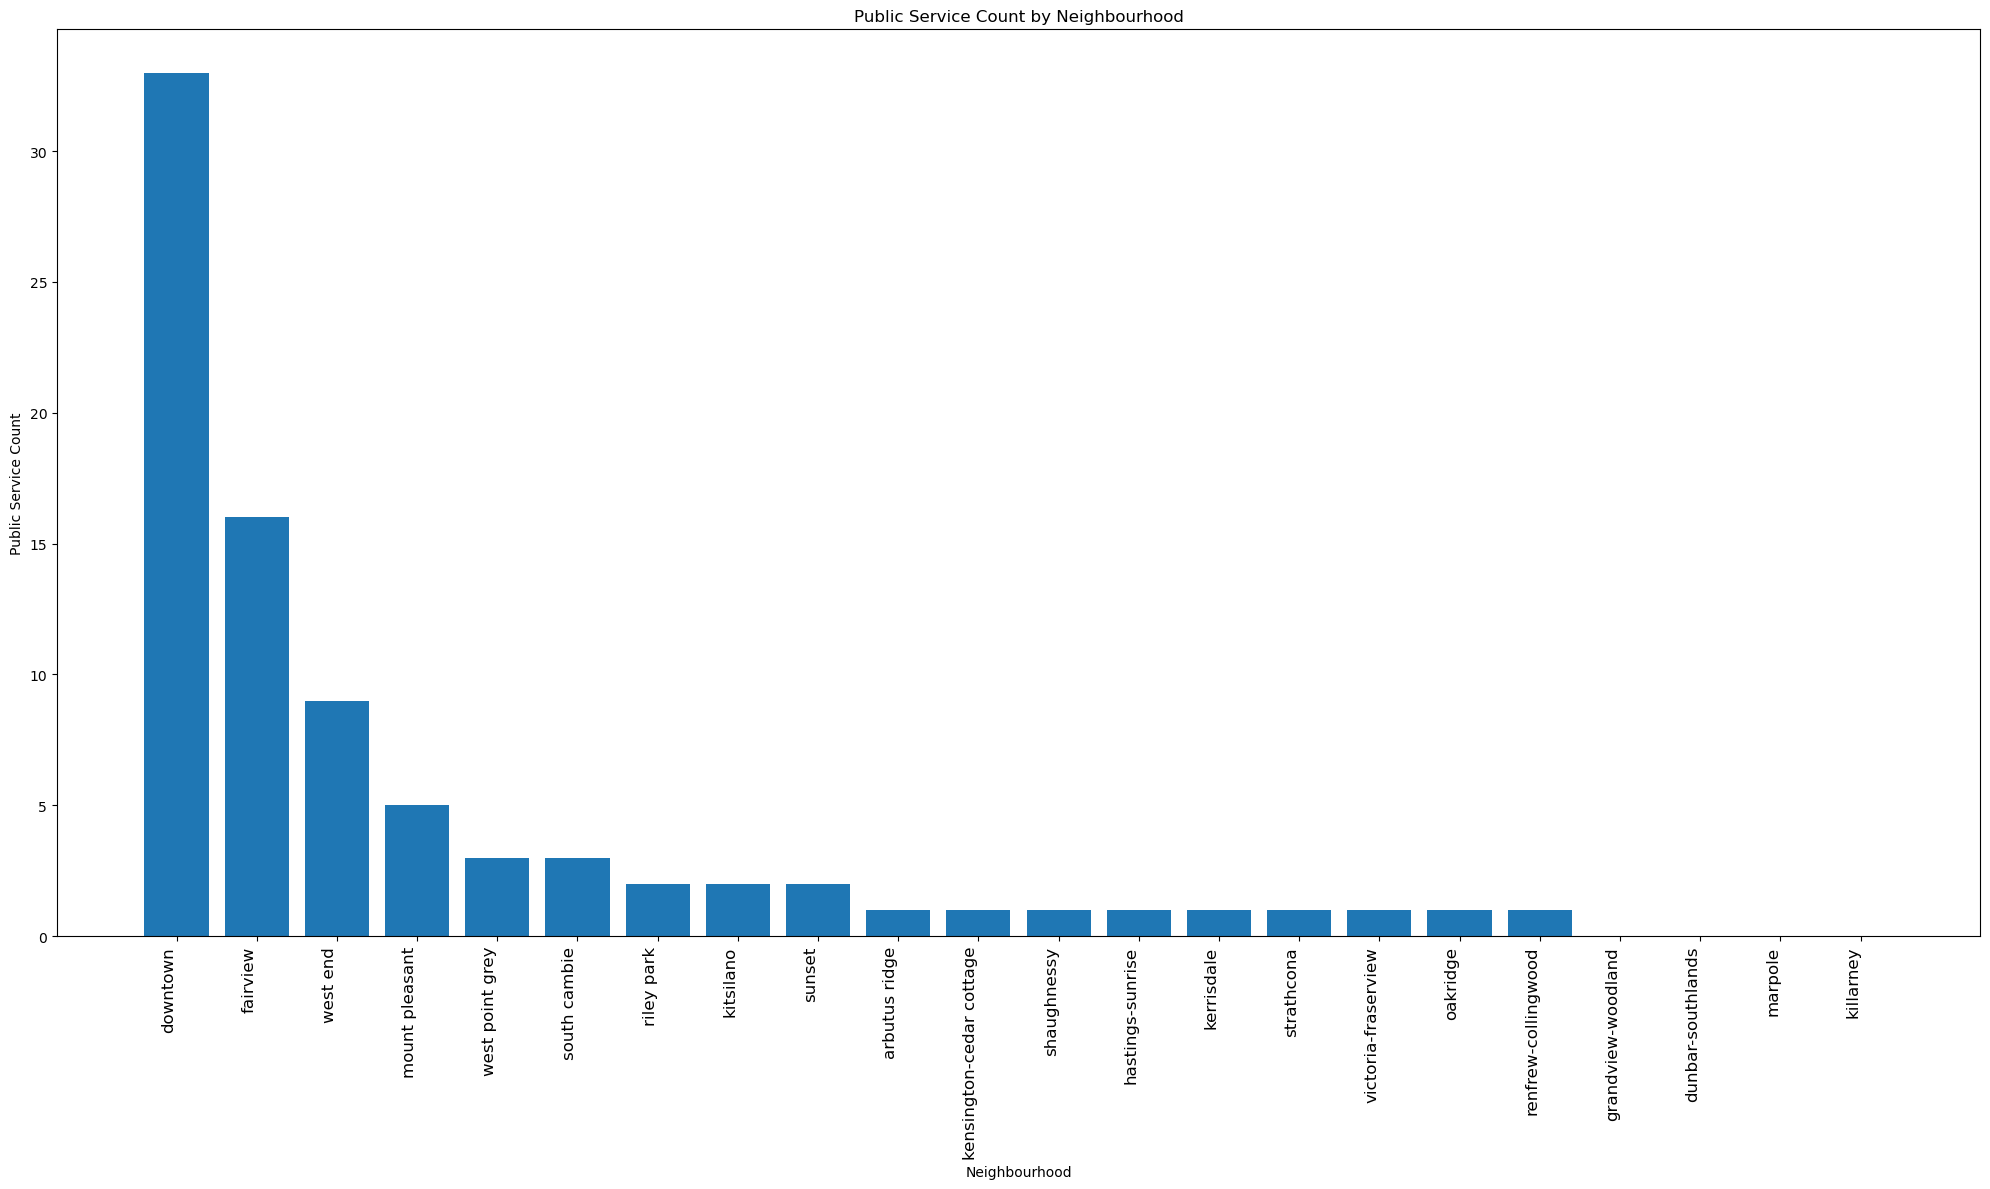

In [128]:
grouped_data = house_data.groupby('neighbourhood_right')['public_service_counts'].mean().sort_values(ascending=False)

# Bar plot 
plt.figure(figsize=(20, 12))
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Neighbourhood')
plt.ylabel('Public Service Count')
plt.title('Public Service Count by Neighbourhood')
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

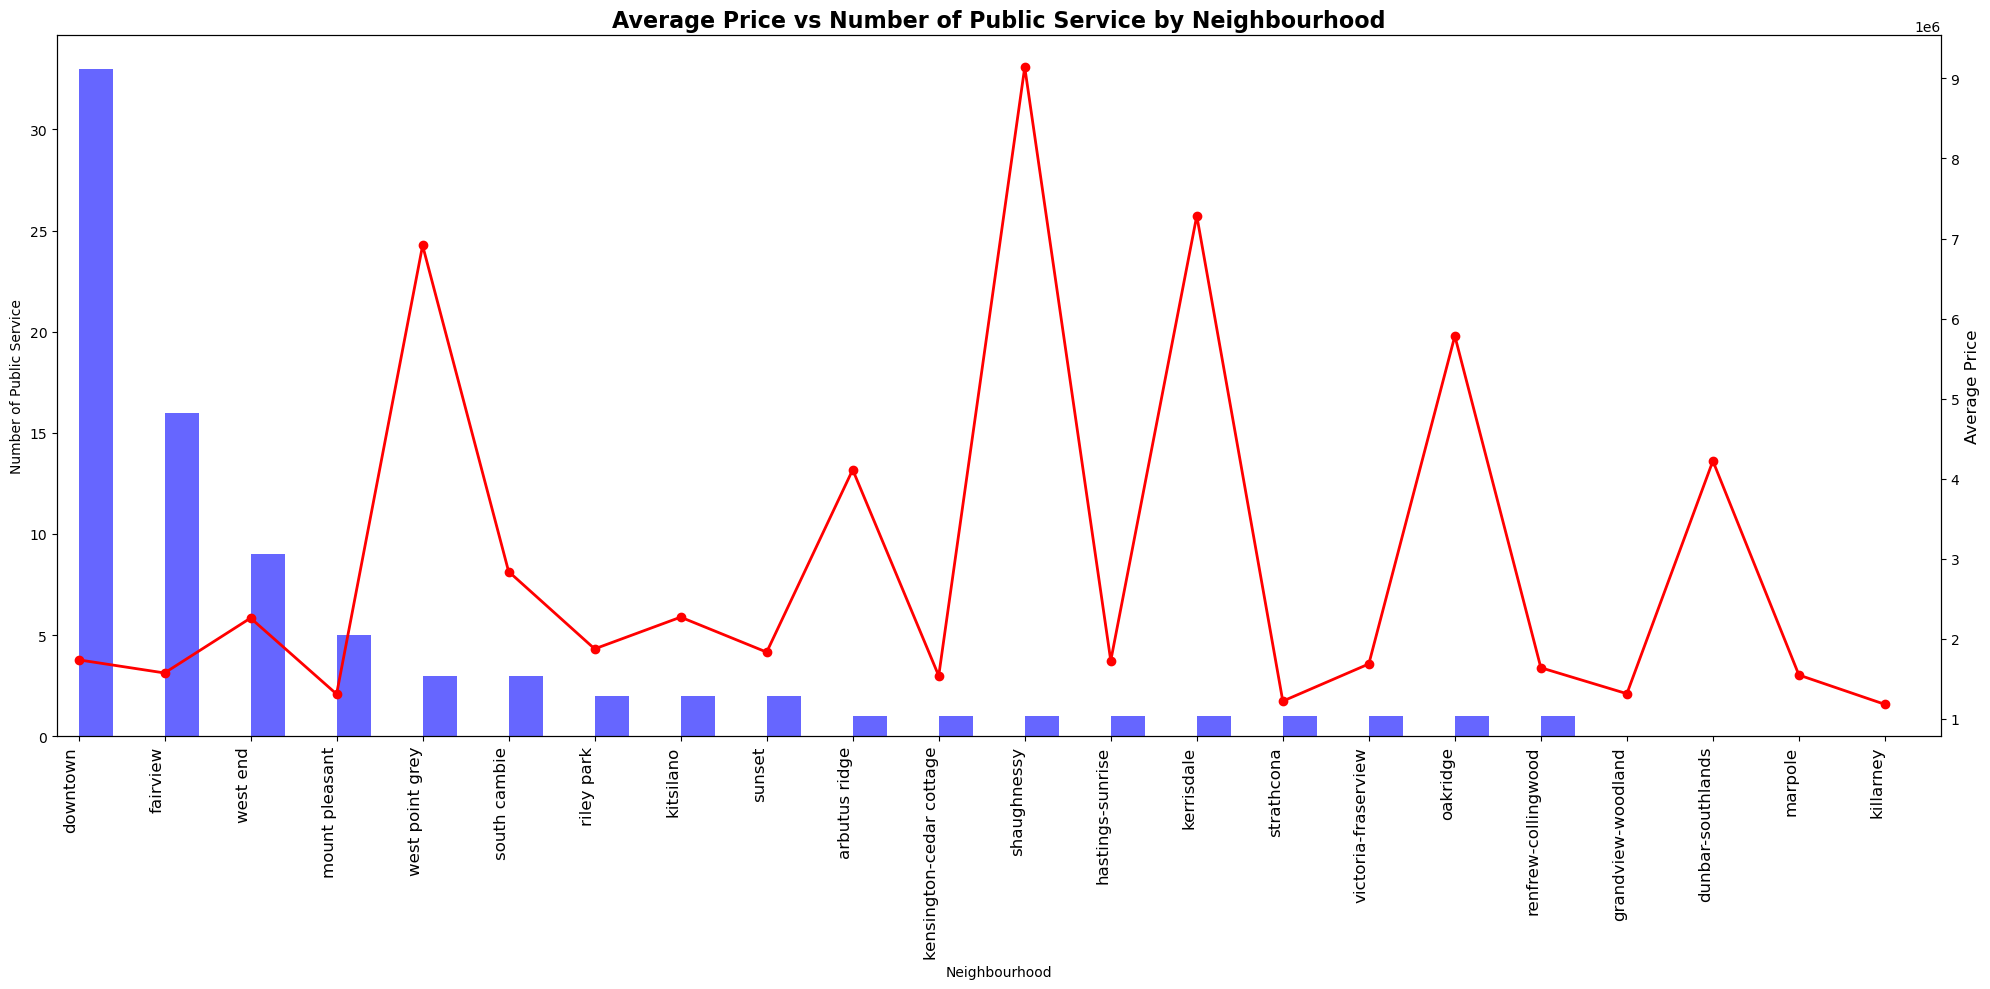

In [75]:
neighbourhood_avg_price = house_data.groupby('neighbourhood_right')['price'].mean()
neighbourhood_service_counts = house_data.groupby('neighbourhood_right')['public_service_counts'].mean()

neighbourhood_data = pd.DataFrame({
    'Average Price': neighbourhood_avg_price,
    'Service Count': neighbourhood_service_counts
}).sort_values(by='Service Count', ascending=False)  


plt.figure(figsize=(20, 10))
neighbourhood_data['Service Count'].plot(kind='bar', color='blue', alpha=0.6, position=0, width=0.4)
plt.ylabel('Number of Public Service')
plt.xlabel('Neighbourhood')
plt.xticks(rotation=90, ha='right', fontsize=12)

ax2 = plt.gca().twinx()
neighbourhood_data['Average Price'].plot(kind='line', color='red', linewidth=2, marker='o', ax=ax2)
ax2.set_ylabel('Average Price', fontsize=12)


plt.title('Average Price vs Number of Public Service by Neighbourhood', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

## Public Transit

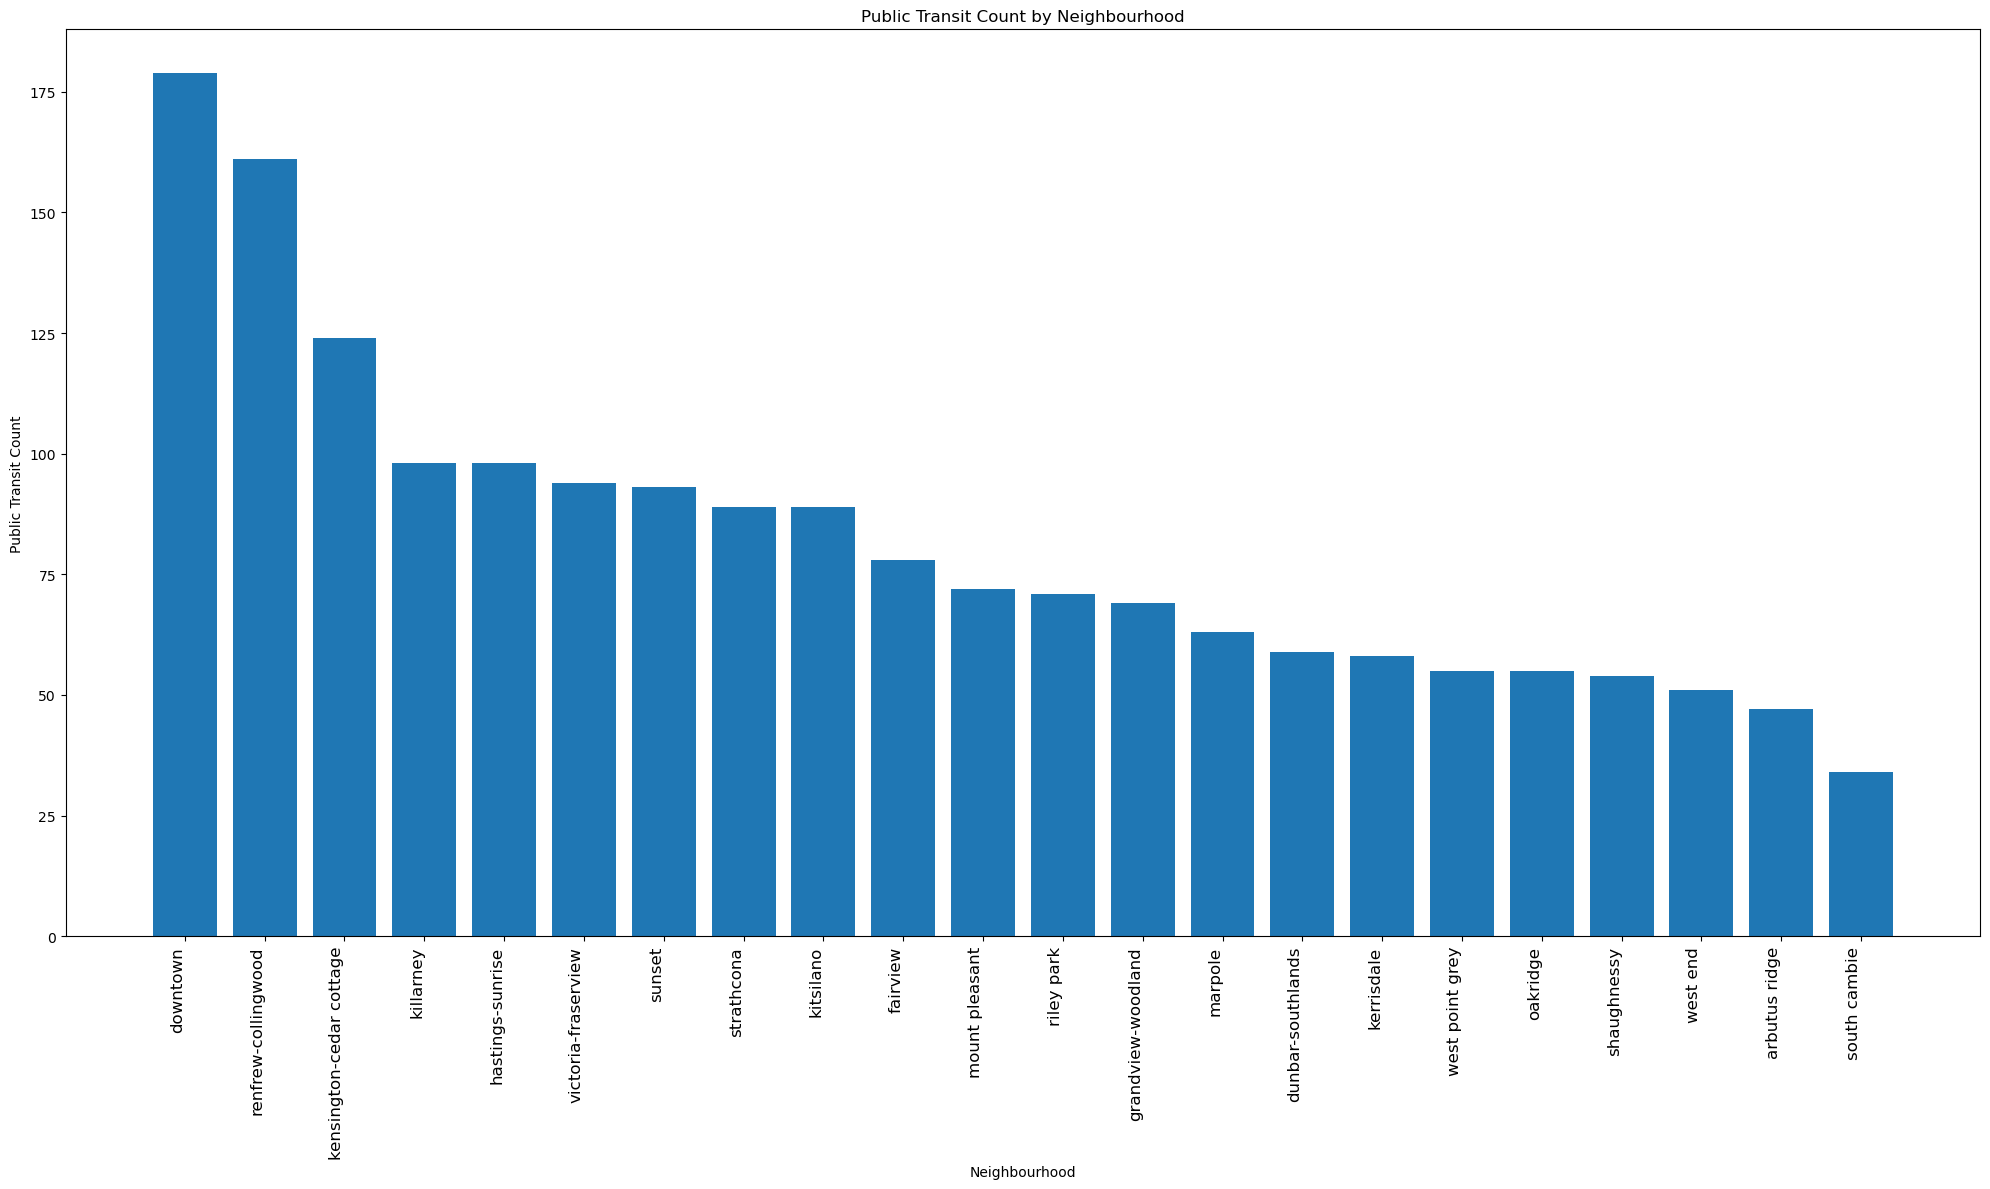

In [132]:
grouped_data = house_data.groupby('neighbourhood_right')['public_transit_counts'].mean().sort_values(ascending=False)

# Bar plot 
plt.figure(figsize=(20, 12))
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Neighbourhood')
plt.ylabel('Public Transit Count')
plt.title('Public Transit Count by Neighbourhood')
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

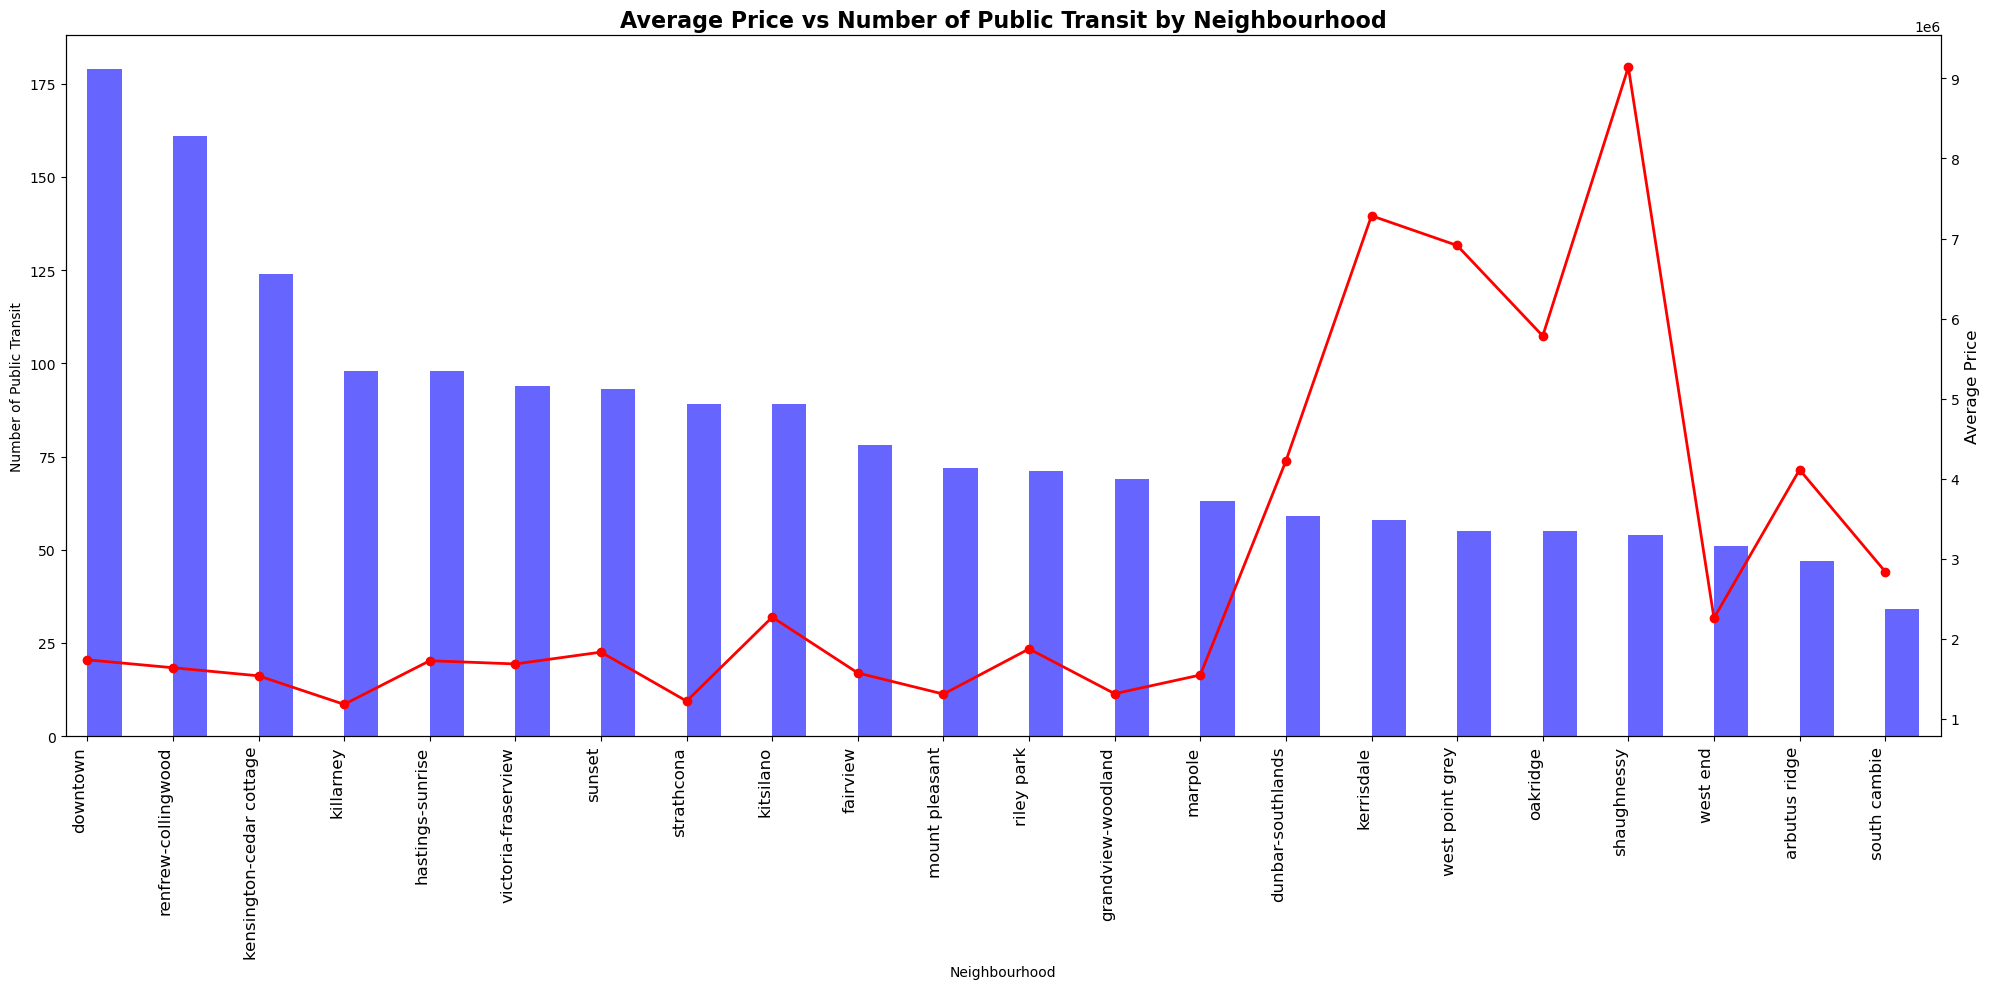

In [80]:
neighbourhood_avg_price = house_data.groupby('neighbourhood_right')['price'].mean()
neighbourhood_transit_counts = house_data.groupby('neighbourhood_right')['public_transit_counts'].mean()

neighbourhood_data = pd.DataFrame({
    'Average Price': neighbourhood_avg_price,
    'Station Count': neighbourhood_transit_counts
}).sort_values(by='Station Count', ascending=False)  


plt.figure(figsize=(20, 10))
neighbourhood_data['Station Count'].plot(kind='bar', color='blue', alpha=0.6, position=0, width=0.4)
plt.ylabel('Number of Public Transit')
plt.xlabel('Neighbourhood')
plt.xticks(rotation=90, ha='right', fontsize=12)

ax2 = plt.gca().twinx()
neighbourhood_data['Average Price'].plot(kind='line', color='red', linewidth=2, marker='o', ax=ax2)
ax2.set_ylabel('Average Price', fontsize=12)


plt.title('Average Price vs Number of Public Transit by Neighbourhood', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

## Other

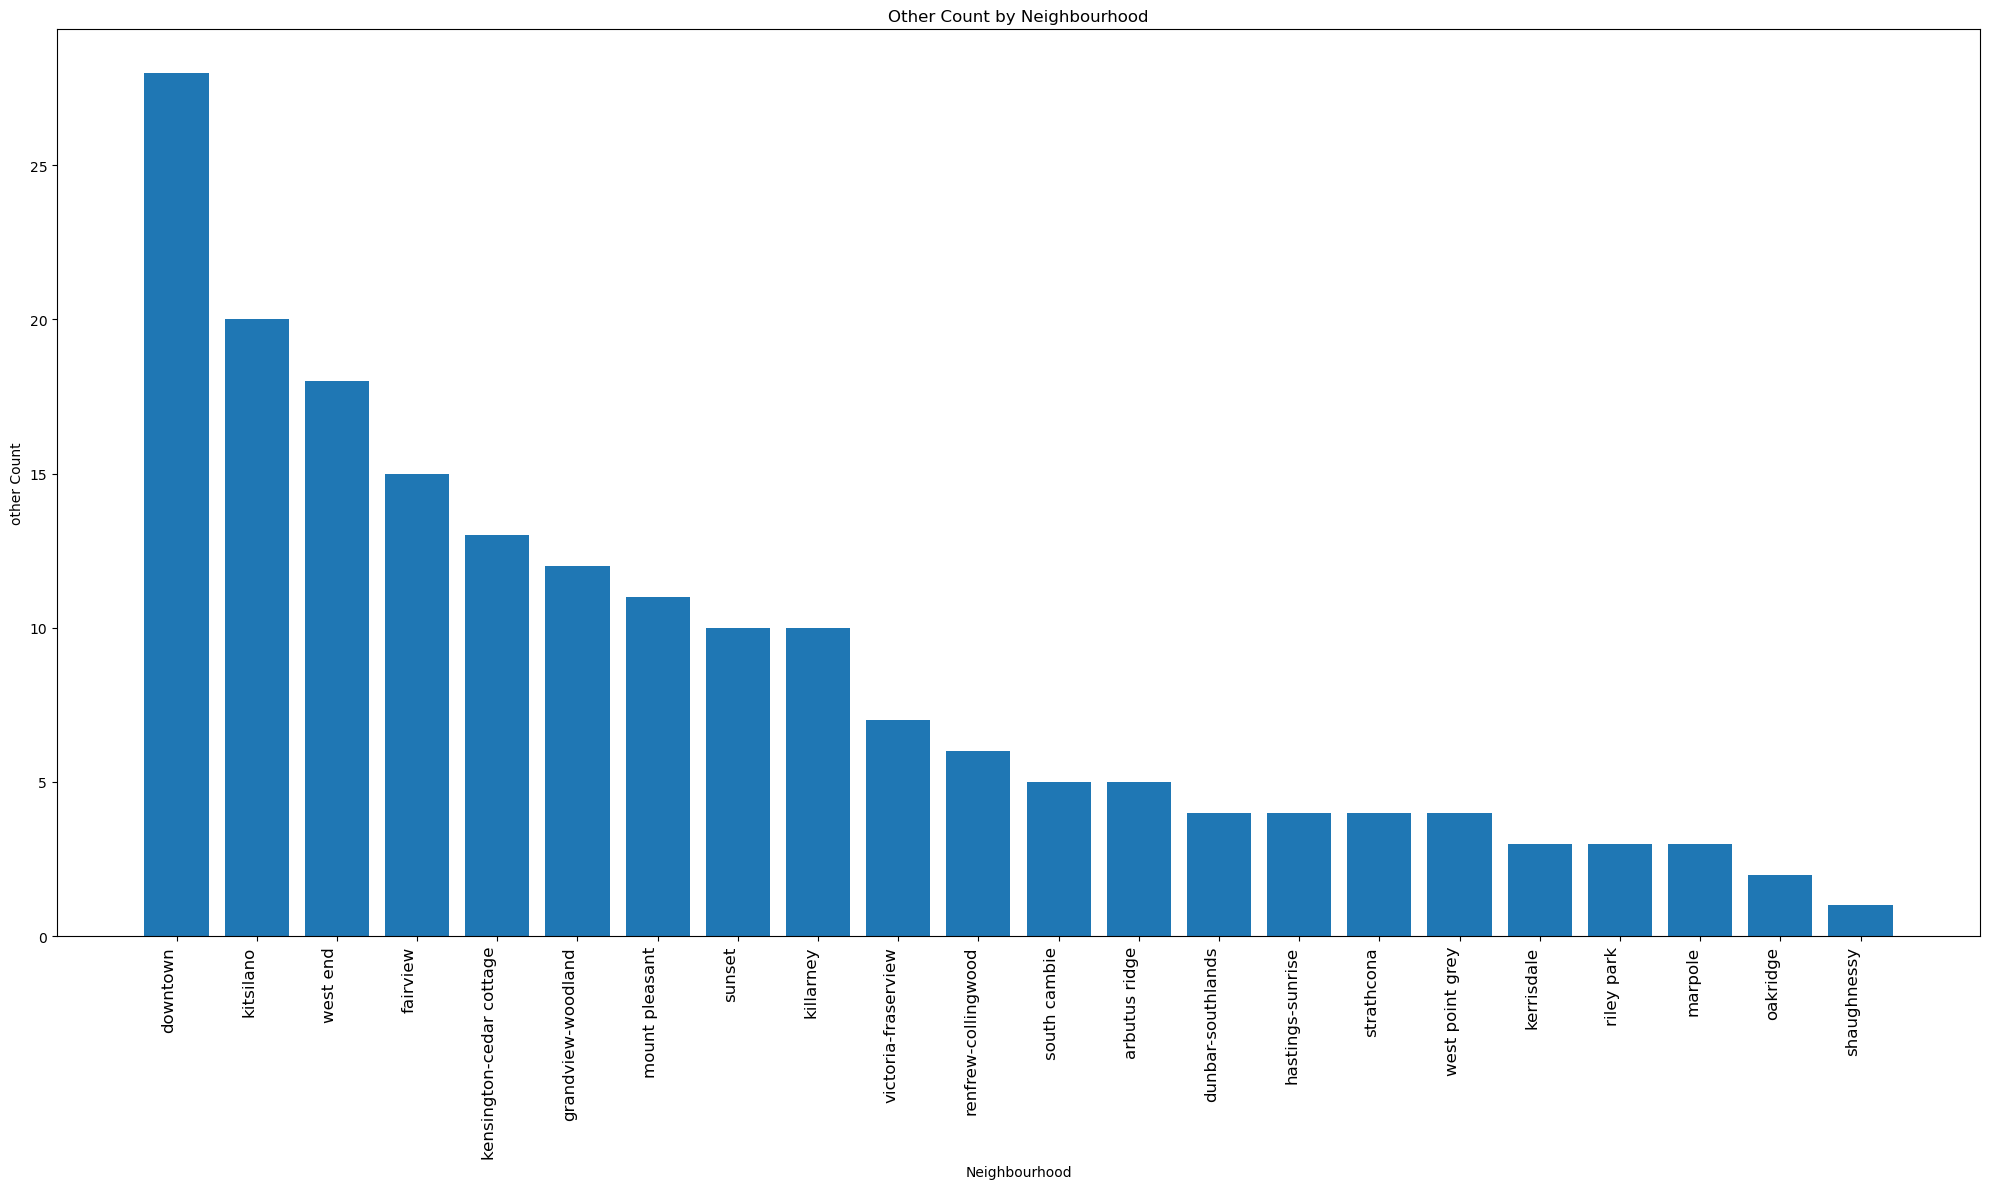

In [136]:
grouped_data = house_data.groupby('neighbourhood_right')['other_counts'].mean().sort_values(ascending=False)

# Bar plot 
plt.figure(figsize=(20, 12))
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Neighbourhood')
plt.ylabel('other Count')
plt.title('Other Count by Neighbourhood')
plt.xticks(rotation=90, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

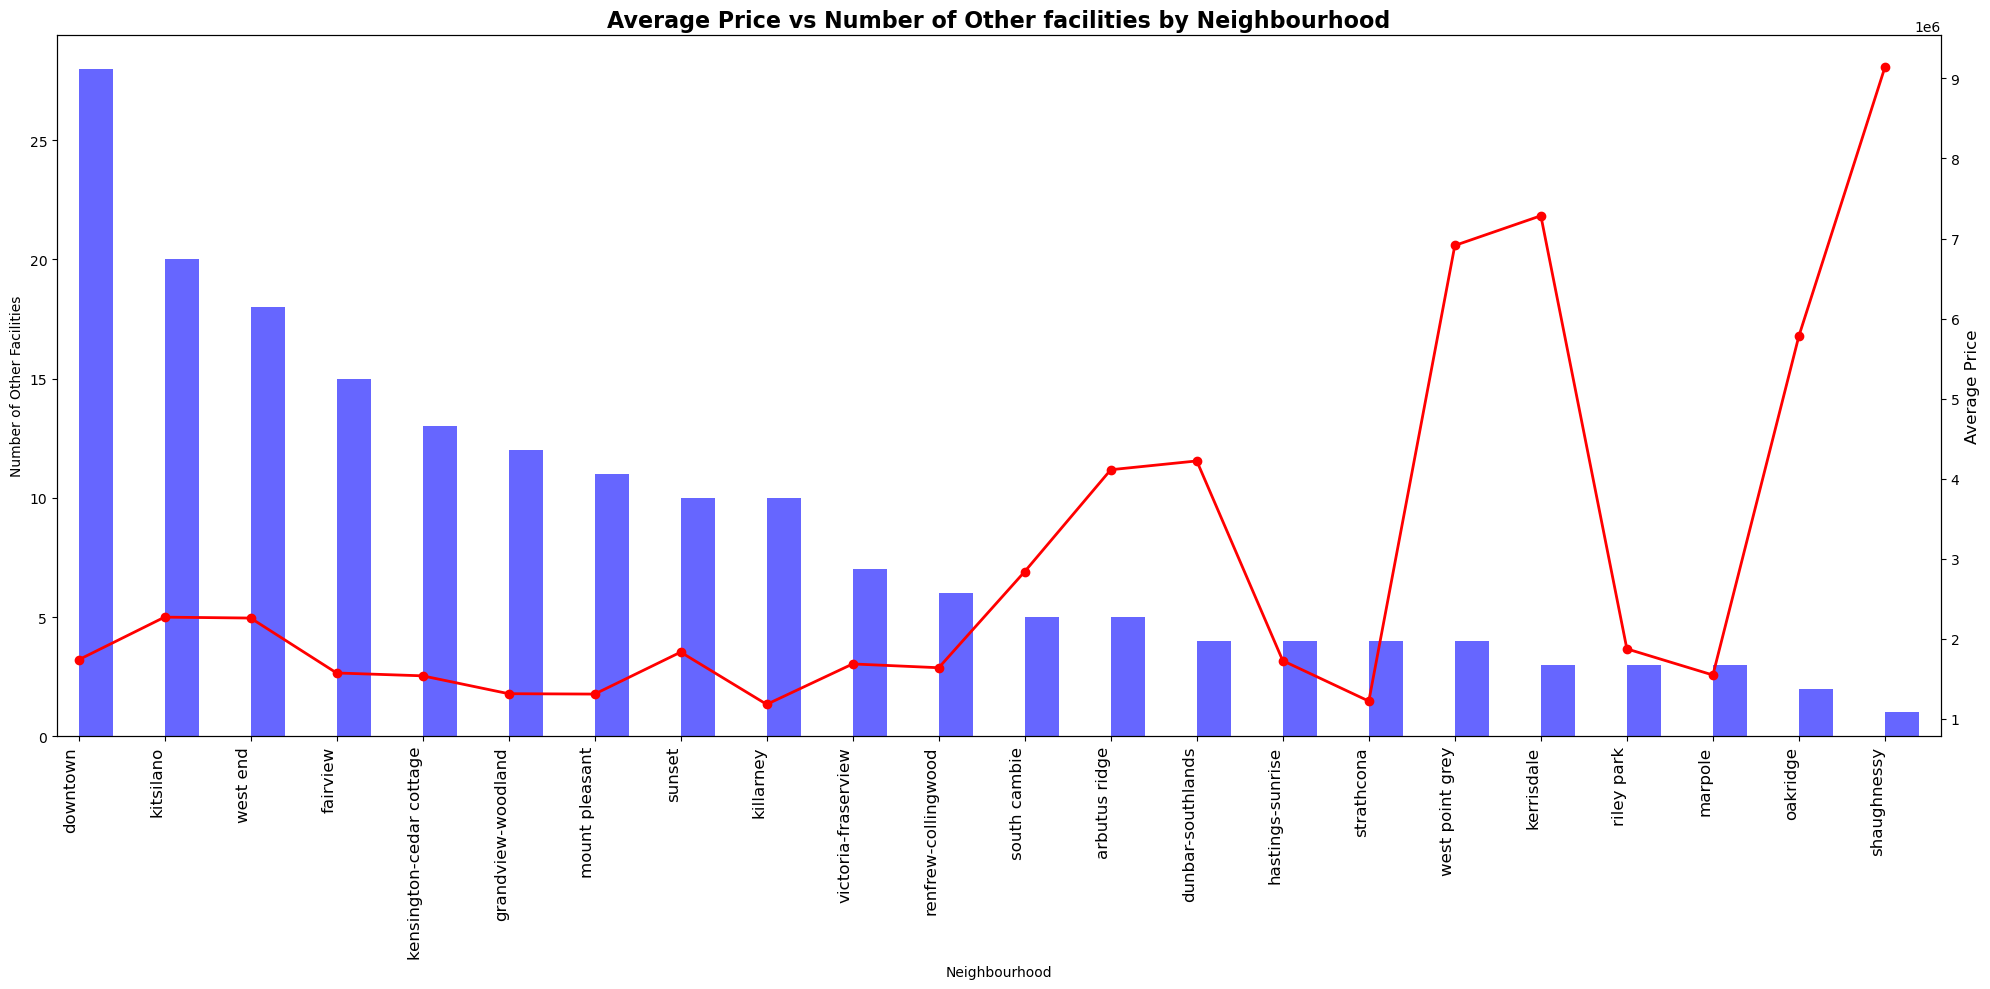

In [85]:
neighbourhood_avg_price = house_data.groupby('neighbourhood_right')['price'].mean()
neighbourhood_other_counts = house_data.groupby('neighbourhood_right')['other_counts'].mean()

neighbourhood_data = pd.DataFrame({
    'Average Price': neighbourhood_avg_price,
    'Others Count': neighbourhood_other_counts
}).sort_values(by='Others Count', ascending=False)


plt.figure(figsize=(20, 10))
neighbourhood_data['Others Count'].plot(kind='bar', color='blue', alpha=0.6, position=0, width=0.4)
plt.ylabel('Number of Other Facilities')
plt.xlabel('Neighbourhood')
plt.xticks(rotation=90, ha='right', fontsize=12)

ax2 = plt.gca().twinx()
neighbourhood_data['Average Price'].plot(kind='line', color='red', linewidth=2, marker='o', ax=ax2)
ax2.set_ylabel('Average Price', fontsize=12)


plt.title('Average Price vs Number of Other facilities by Neighbourhood', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

We can see from above, downtown always has the most facilities